In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [77]:
df=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

In [78]:
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [79]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [80]:
df.shape

(1460, 81)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Exploring numerical features**

In [82]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 38 columns]

In [83]:
numerical_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [84]:
numerical_features.shape

(1460, 38)

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='SalePrice', ylabel='Count'>

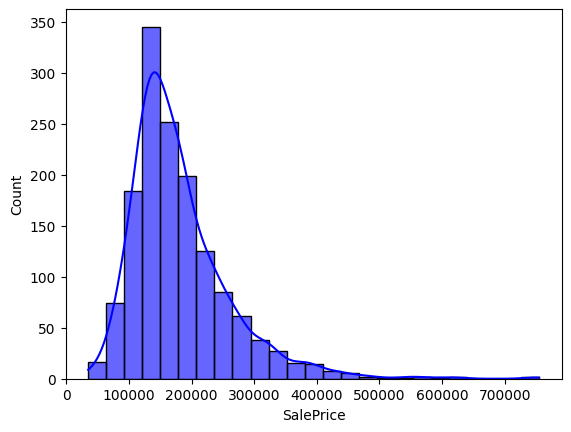

In [86]:
sns.histplot(df.SalePrice, bins=25, kde=True, color='blue', alpha=0.6, label='Histogram')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

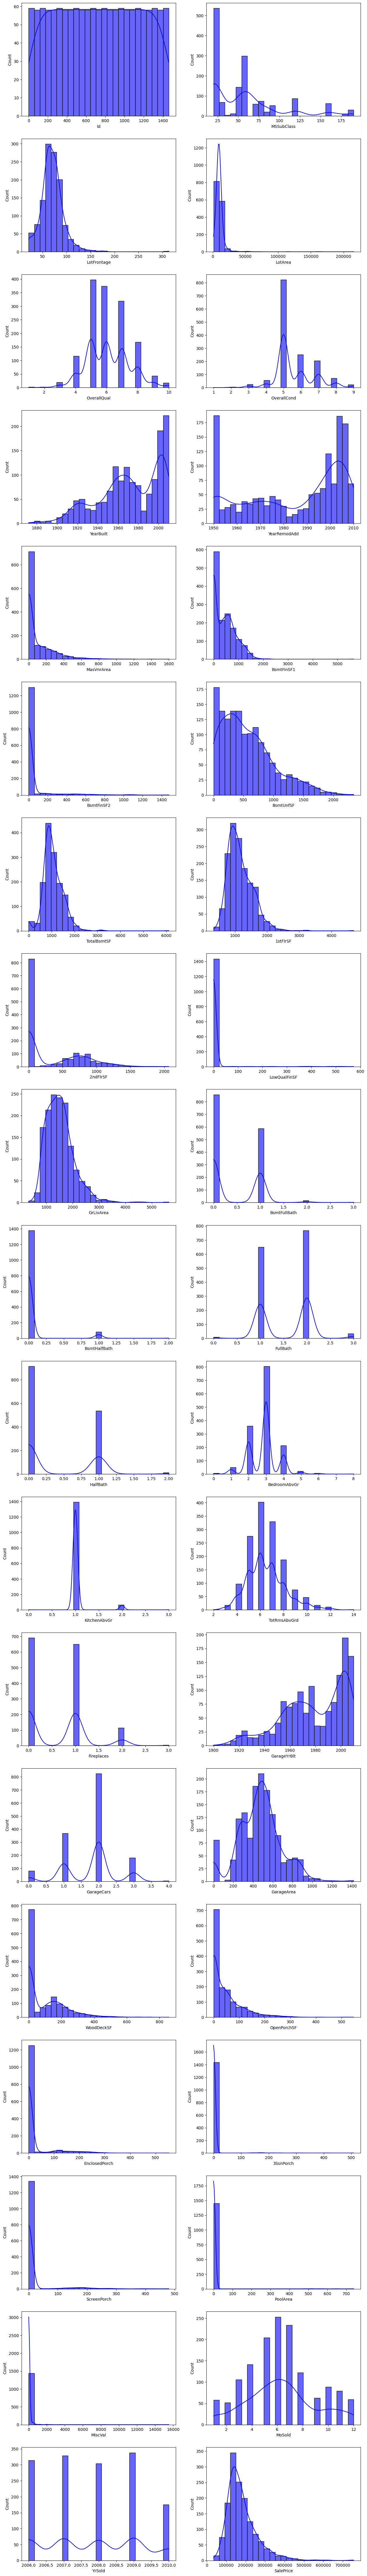

In [87]:
num_cols = numerical_features.shape[1]  # Nombre de colonnes dans la DataFrame
num_rows = (num_cols + 1) // 2  # Nombre de lignes pour disposer les sous-graphiques
plt.figure(figsize=(15, 6*num_rows))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(num_rows, 2, i+1)
    sns.histplot(numerical_features[col], bins=25, kde=True, color='blue', alpha=0.6, label='Histogram')
    

In [88]:
numerical_features.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [89]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

Text(0.5, 1.0, 'Matrice de Corrélation des Descripteurs')

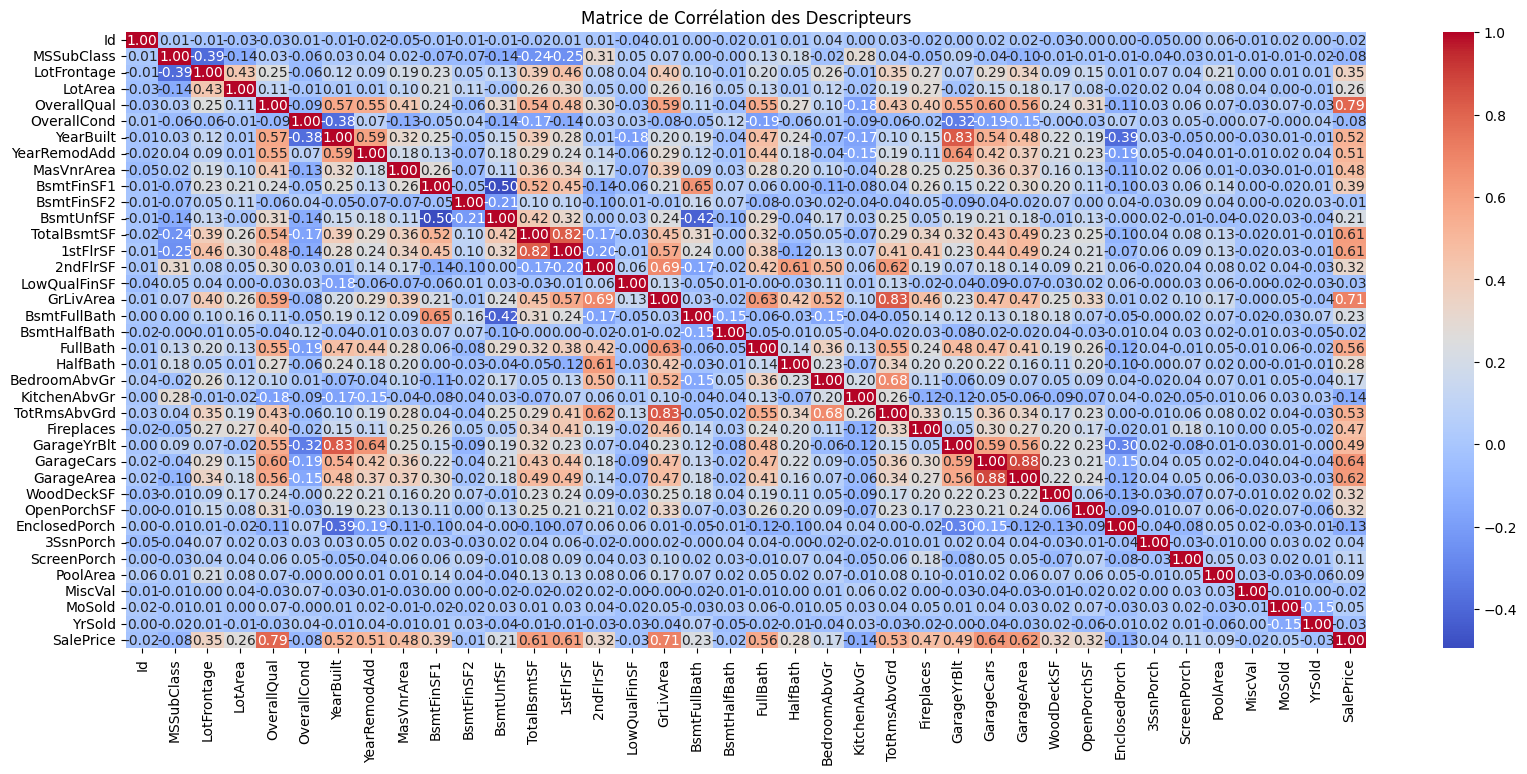

In [90]:
corr_matrix=numerical_features.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation des Descripteurs')

**we can obviously observe that there is some features that has a low to null variance we are going to get ride of these columns**

In [91]:
df2=df.copy()

In [92]:
test2=test.copy()

In [93]:
df2.drop(columns=['Id','MiscVal','BsmtHalfBath','ScreenPorch','3SsnPorch','KitchenAbvGr','BsmtFinSF2','BsmtHalfBath','YrSold','MoSold','PoolArea','LowQualFinSF','OverallCond','MSSubClass'],inplace=True)
test.drop(columns=['Id','MiscVal','BsmtHalfBath','ScreenPorch','3SsnPorch','KitchenAbvGr','BsmtFinSF2','BsmtHalfBath','YrSold','MoSold','PoolArea','LowQualFinSF','OverallCond','MSSubClass'],inplace=True)

In [94]:
df2.shape

(1460, 68)

**Adressing null Values for numerical Features**

In [95]:
numerical=df2.select_dtypes(np.number)

In [96]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1452 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  TotRmsAbvGrd   1460 non-null   int64  
 17  Fireplaces     1460 non-null   int64  
 18  GarageYr

In [97]:
null = numerical.isnull().sum()
null_percentage = (null/len(df2))*100
null_percentage[null_percentage > 0 ].sort_values(ascending=False)

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
dtype: float64

In [98]:
numerical_test=test.select_dtypes(np.number)
null_test = numerical_test.isnull().sum()
null_percentage_test = (null_test/len(df2))*100
null_percentage_test[null_percentage_test > 0 ].sort_values(ascending=False)

LotFrontage     15.547945
GarageYrBlt      5.342466
MasVnrArea       1.027397
BsmtFullBath     0.136986
BsmtFinSF1       0.068493
BsmtUnfSF        0.068493
TotalBsmtSF      0.068493
GarageCars       0.068493
GarageArea       0.068493
dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BsmtFullBath', ylabel='Count'>

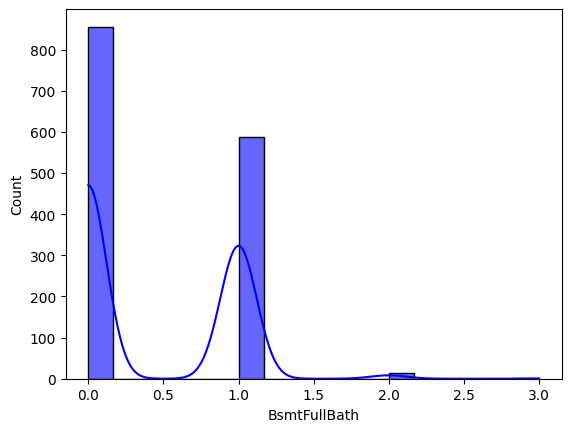

In [99]:
sns.histplot(df2.BsmtFullBath,kde=True, color='blue', alpha=0.6, label='Histogram')

In [100]:
df2['LotFrontage'] = df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())


df2['GarageYrBlt'] = df2['GarageYrBlt'].fillna(0)  
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)

df2['MasVnrArea'] = df2['MasVnrArea'].fillna(df2['MasVnrArea'].mean() ) 
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean() )
test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)  
test['BsmtUnfSF'].fillna(test['BsmtUnfSF'].mean(),inplace=True)
test['BsmtFullBath'].fillna(0 ,inplace=True)
test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean(),inplace=True) 
test['GarageArea'].fillna(test['GarageArea'].mean(),inplace=True) 
test['GarageCars'].fillna(2,inplace=True)

/tmp/ipykernel_33/1625182114.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['BsmtFinSF1'].fillna(test['BsmtFinSF1'].mean(),inplace=True)
/tmp/ipykernel_33/1625182114.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [101]:
df2.select_dtypes(np.number).isnull().sum()

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
SalePrice        0
dtype: int64

In [102]:
test.select_dtypes(np.number).isnull().sum()

LotFrontage      0
LotArea          0
OverallQual      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
dtype: int64

**Exploring Categorigal features**

In [103]:
categorical_features=df.select_dtypes(include=['object'])

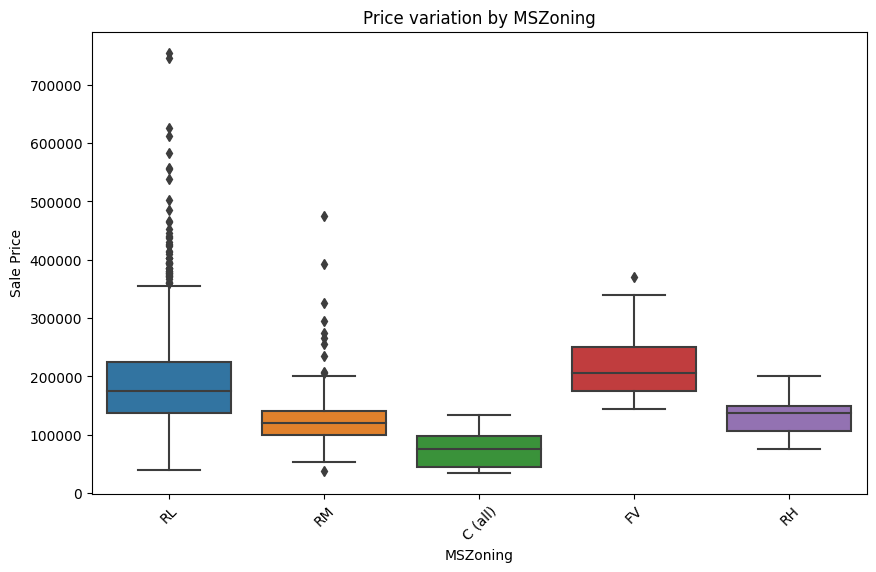

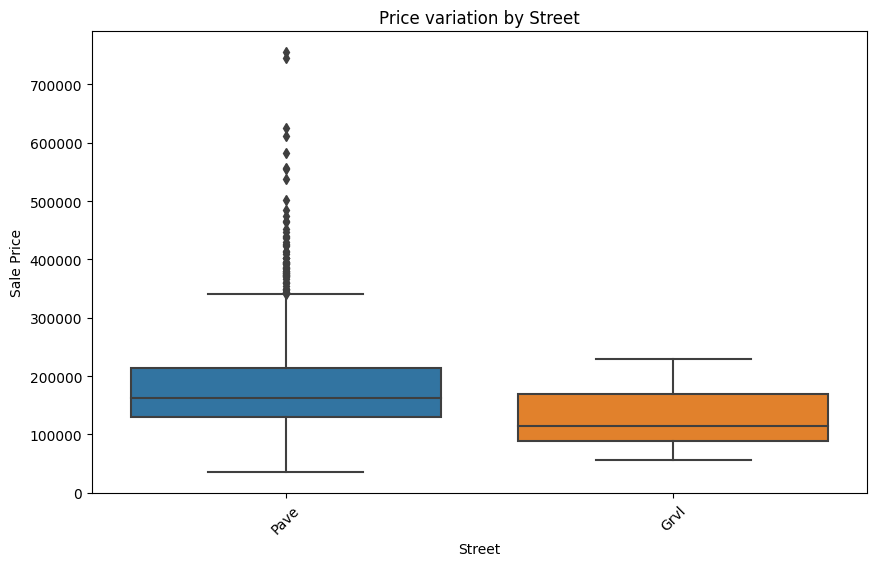

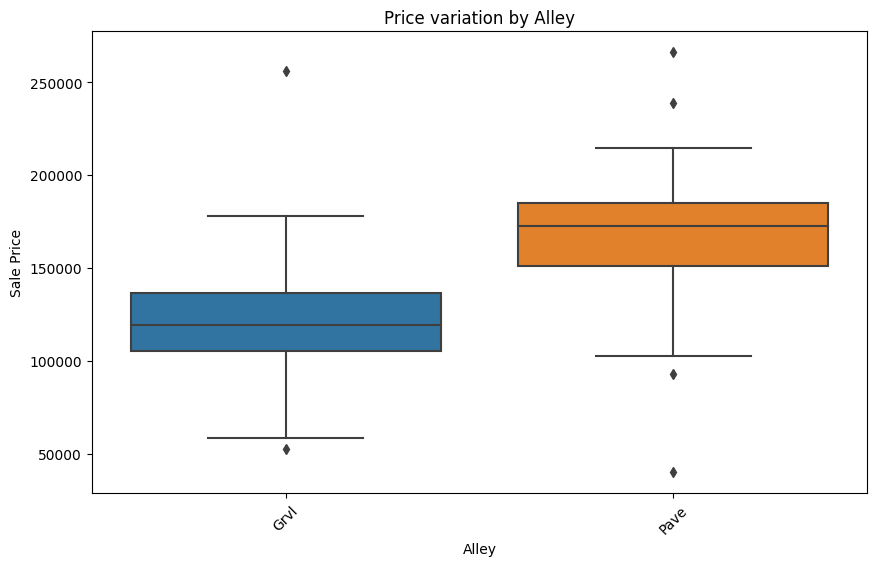

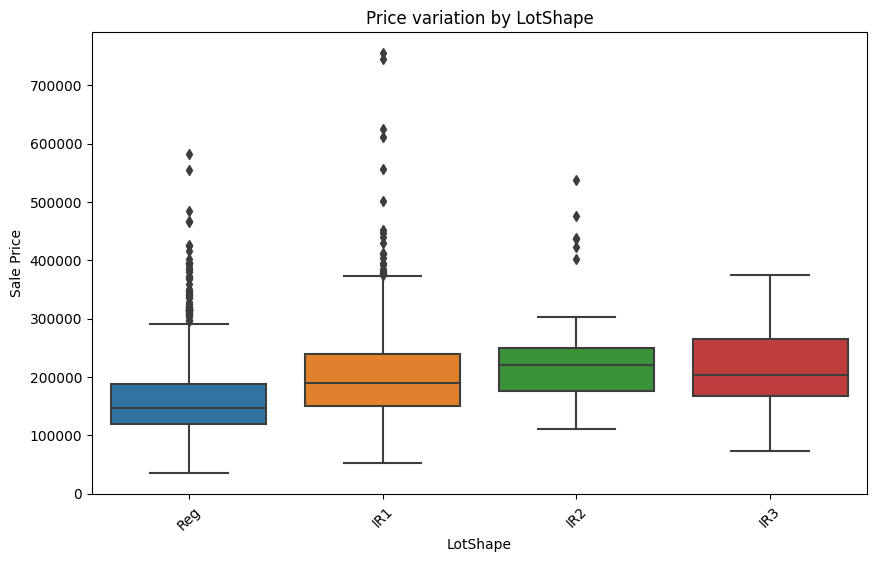

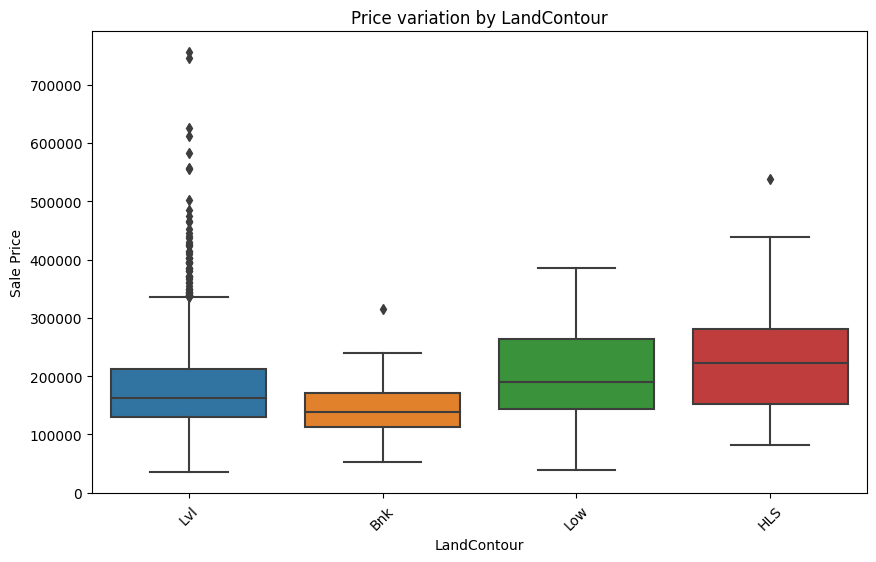

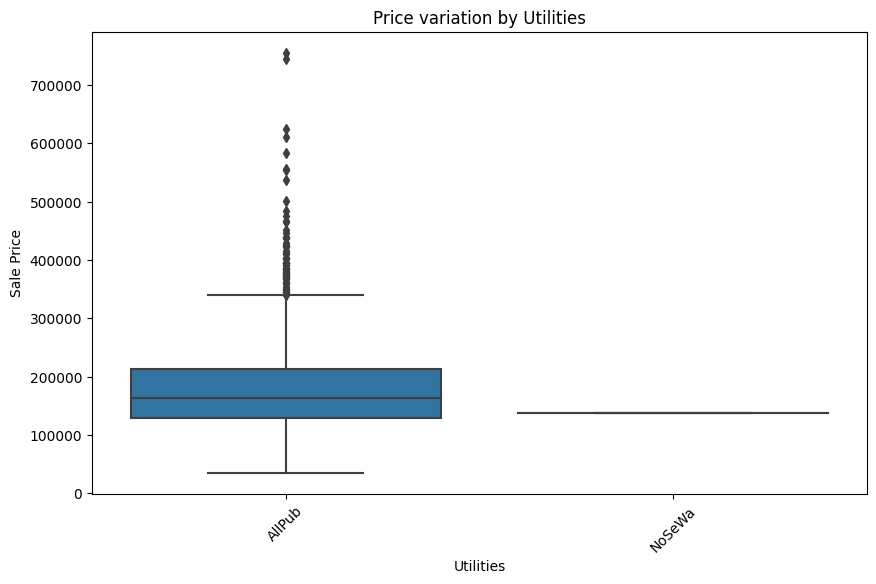

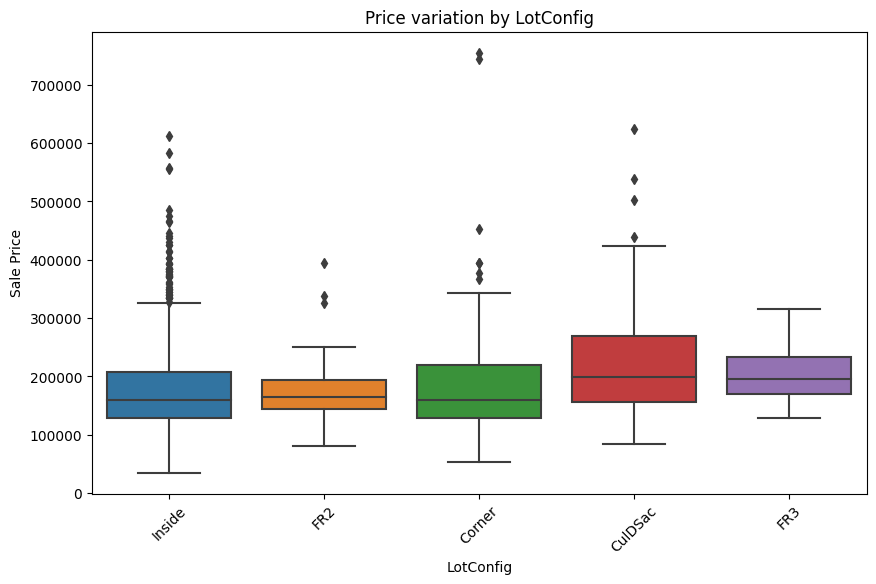

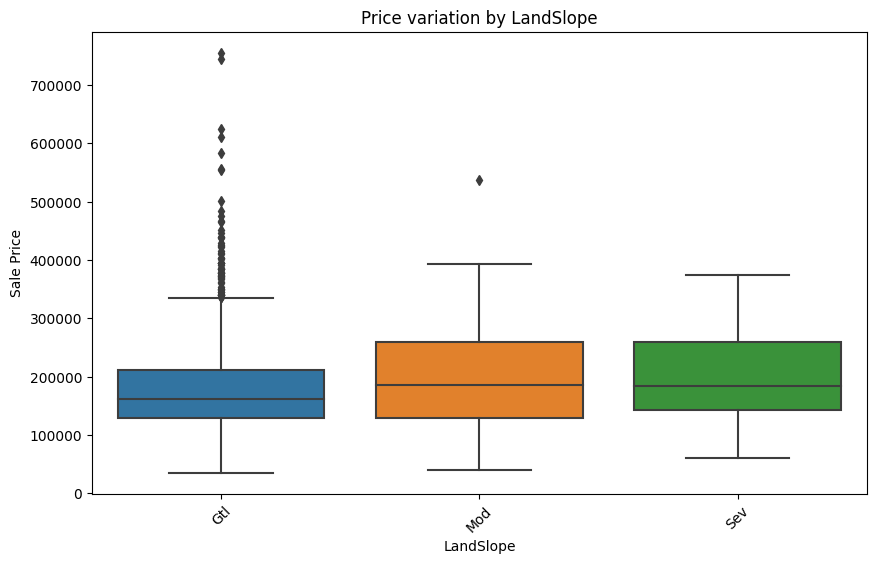

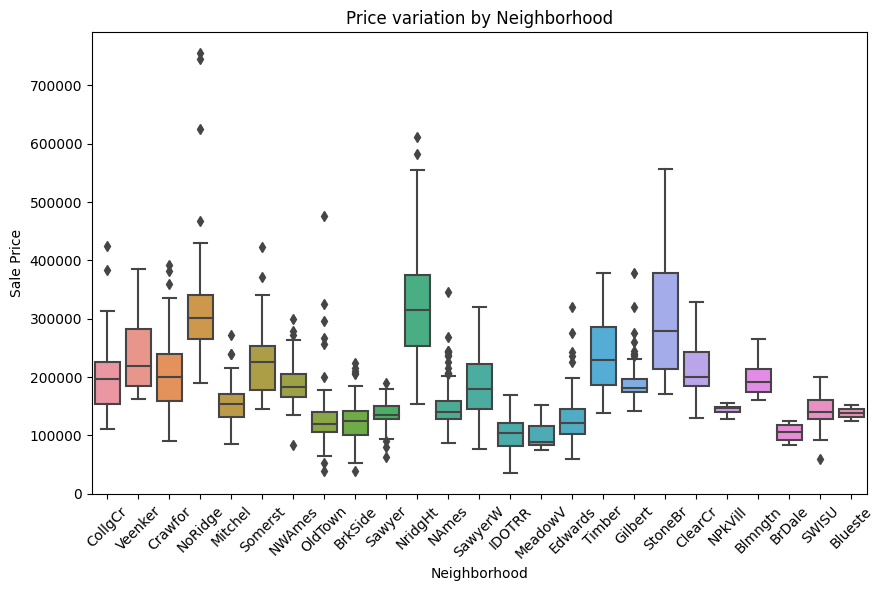

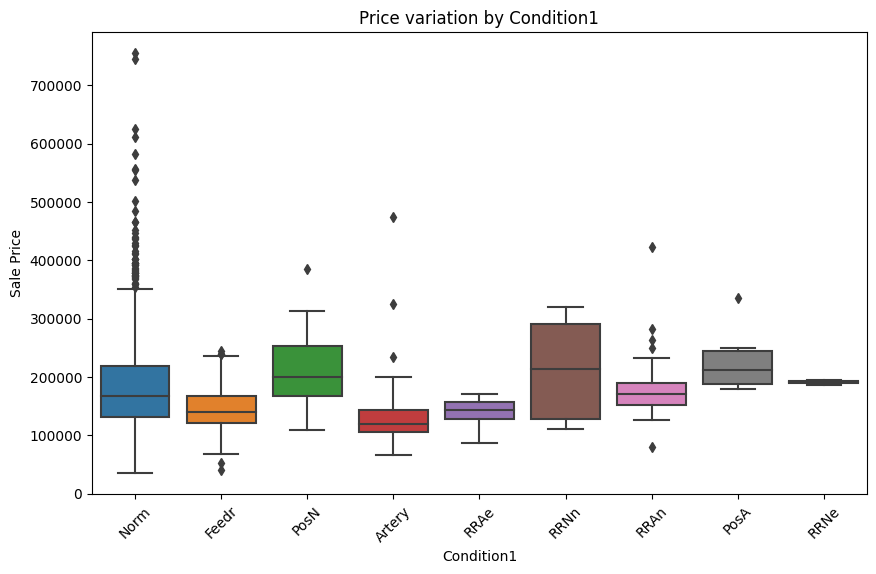

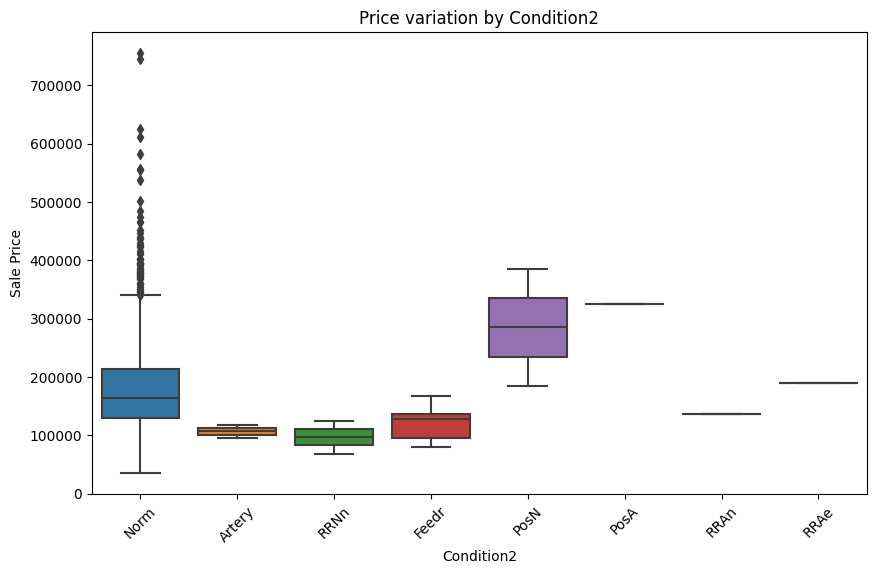

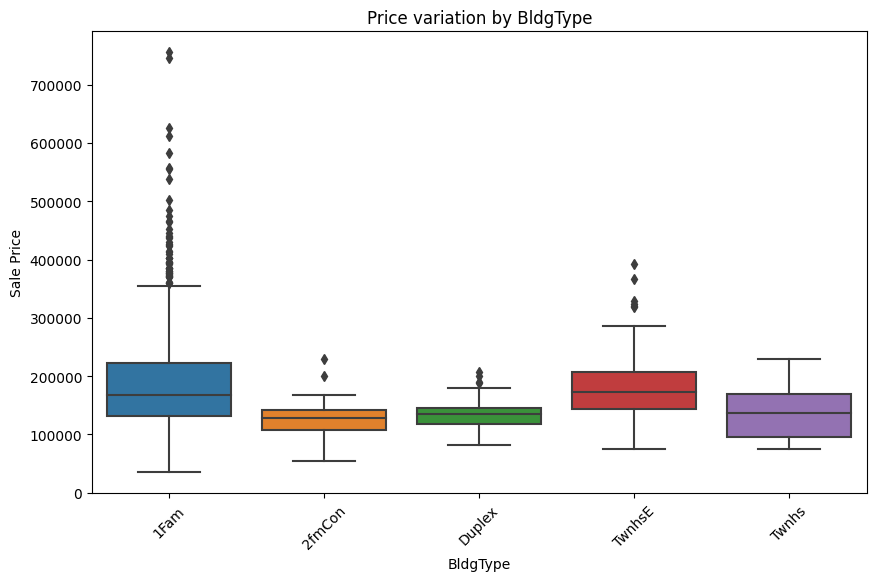

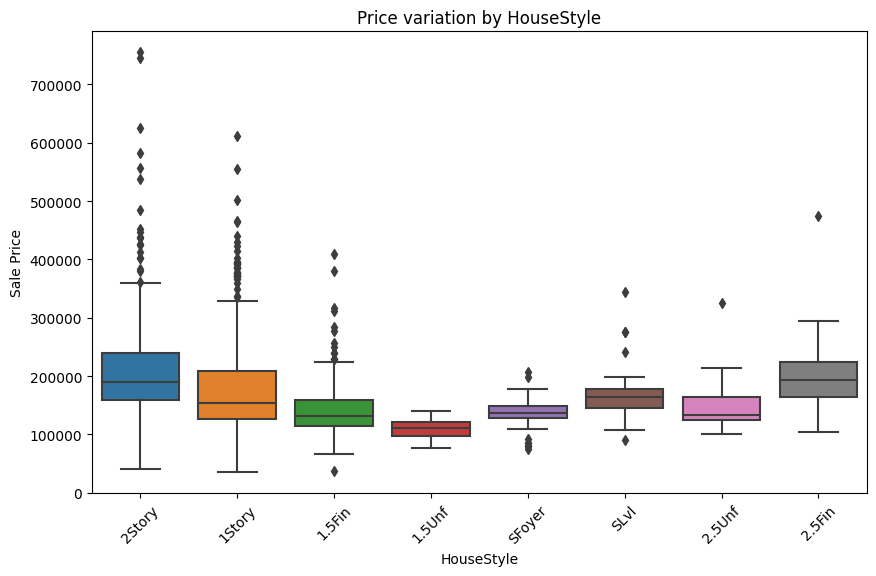

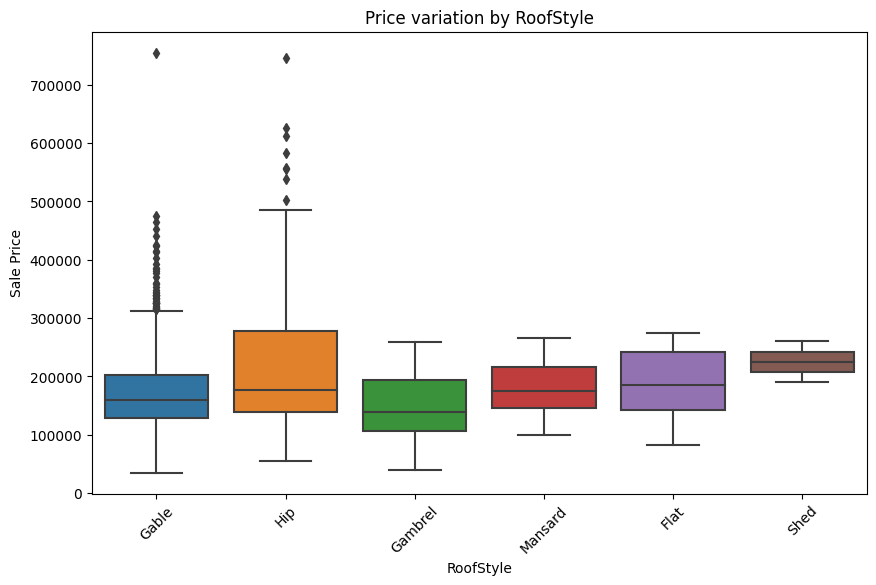

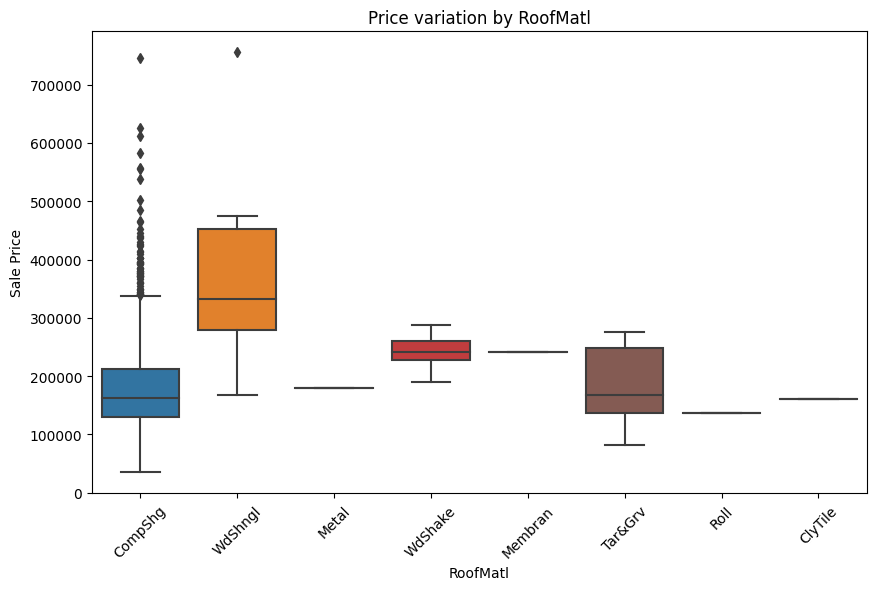

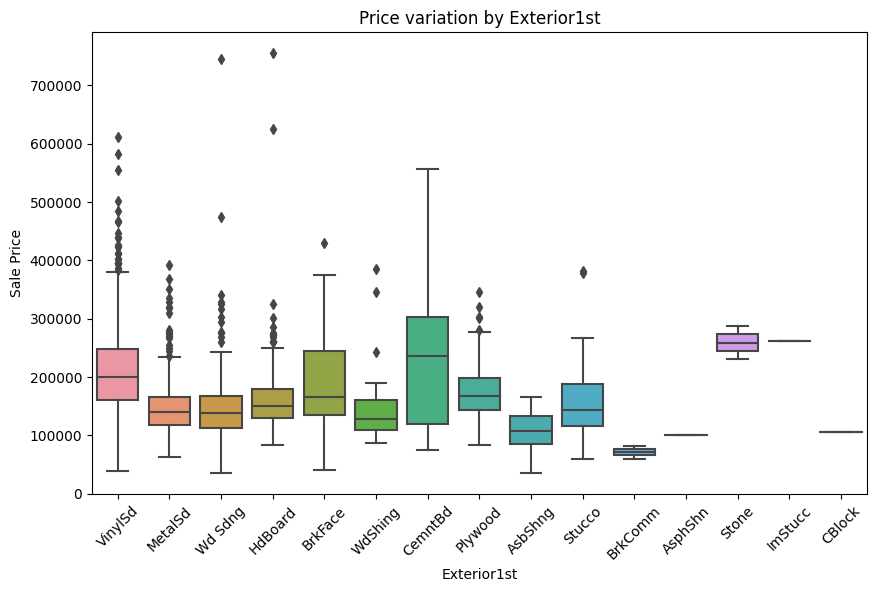

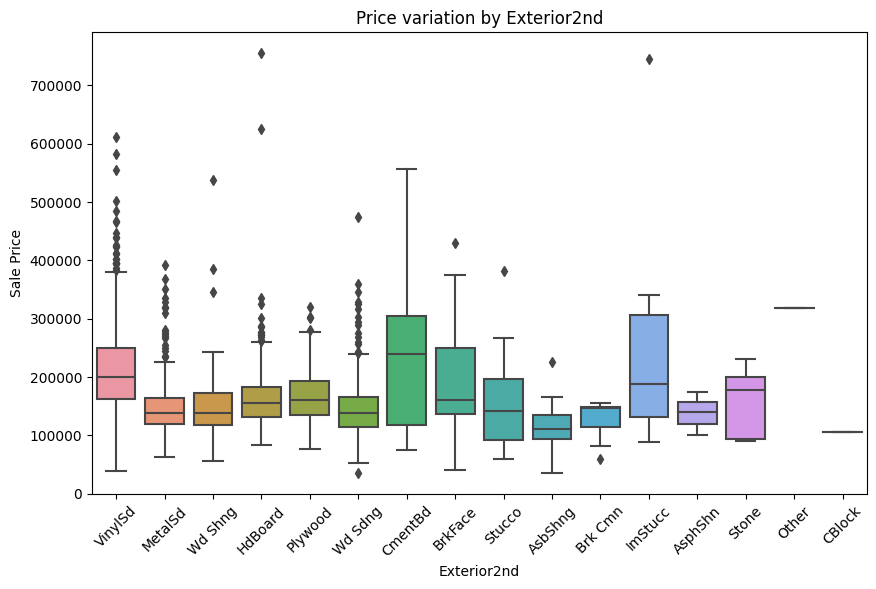

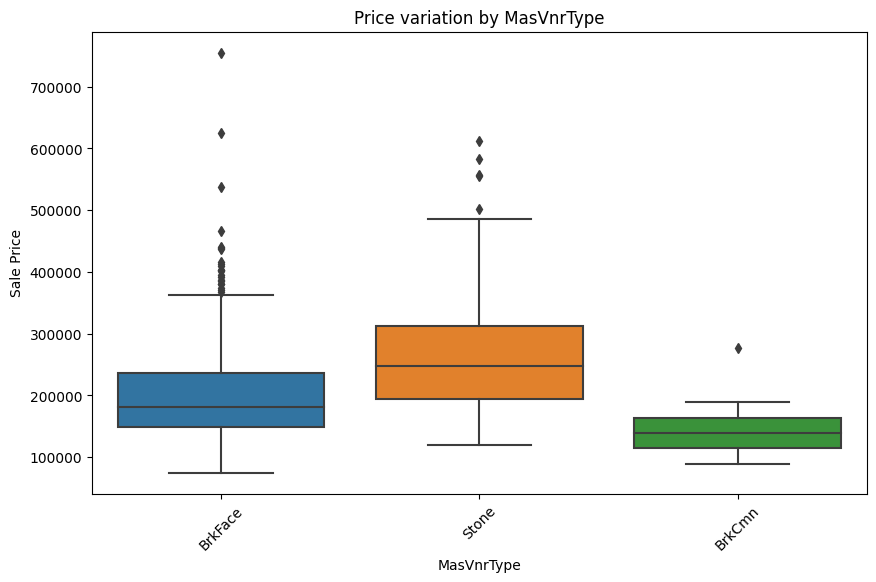

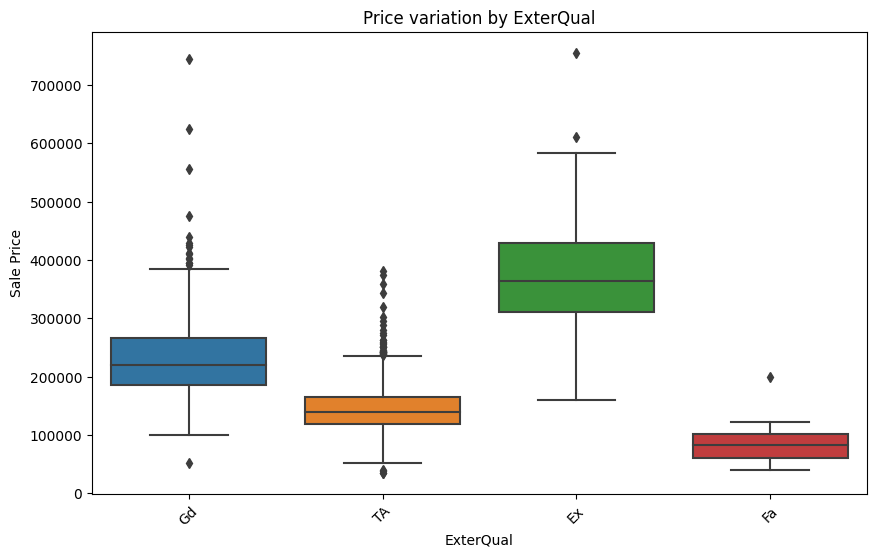

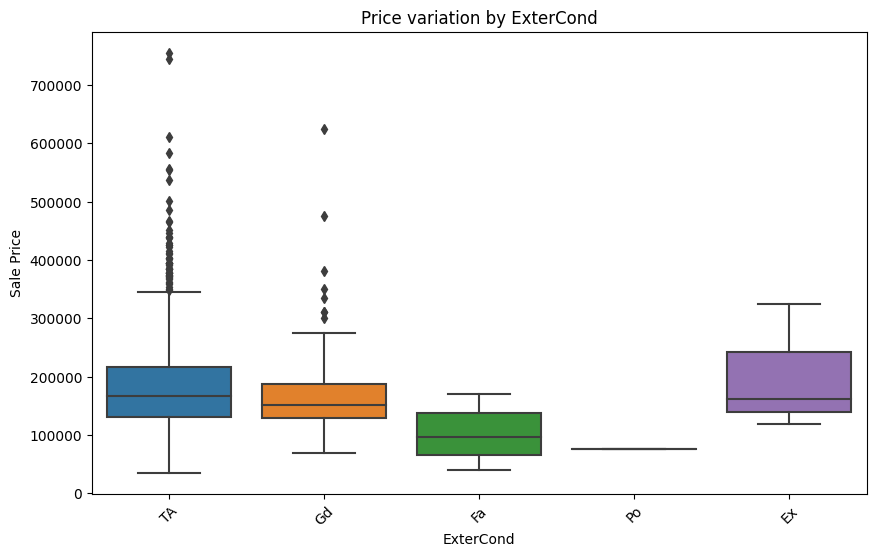

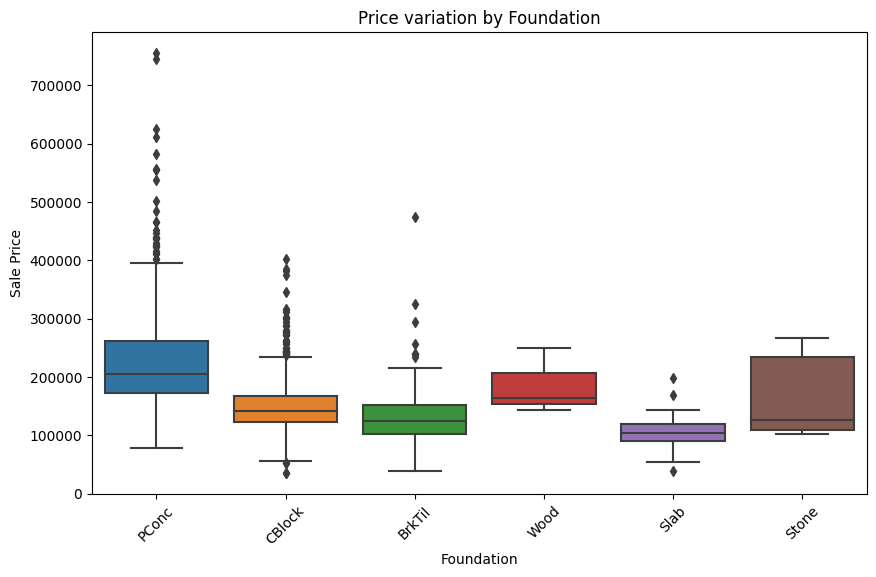

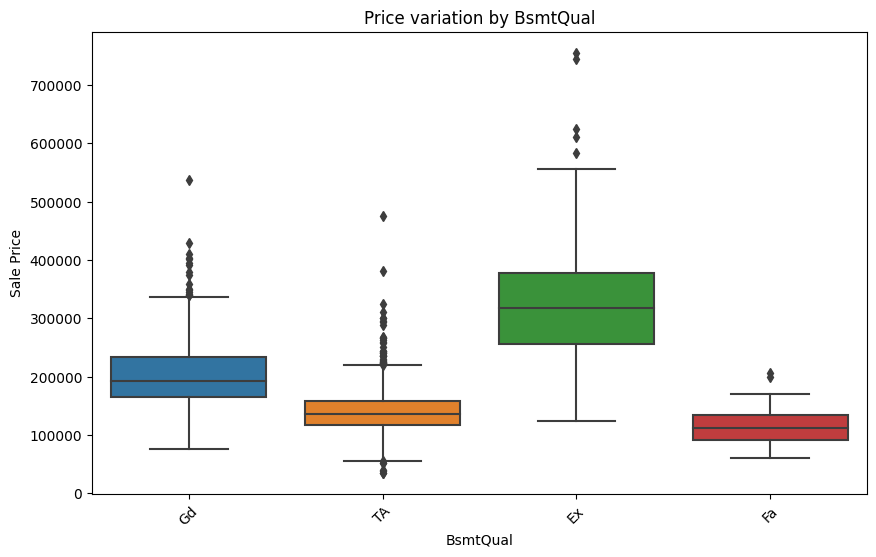

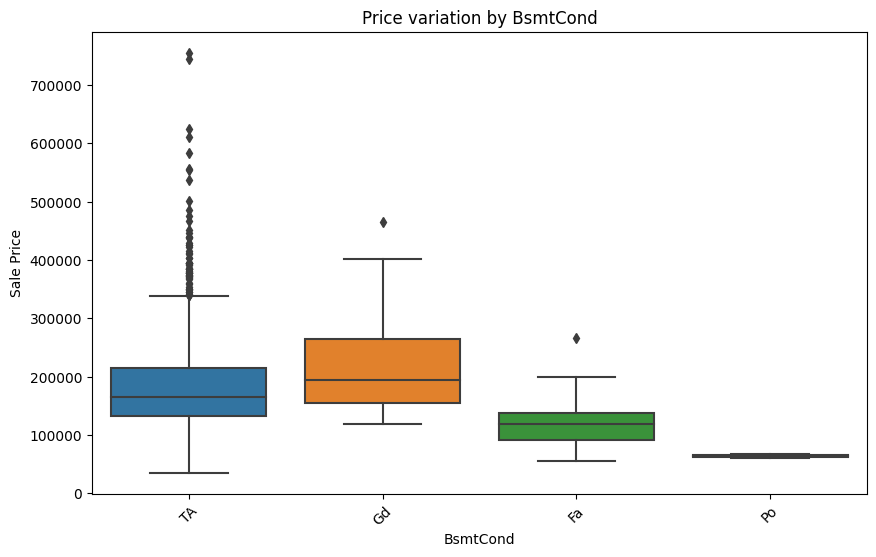

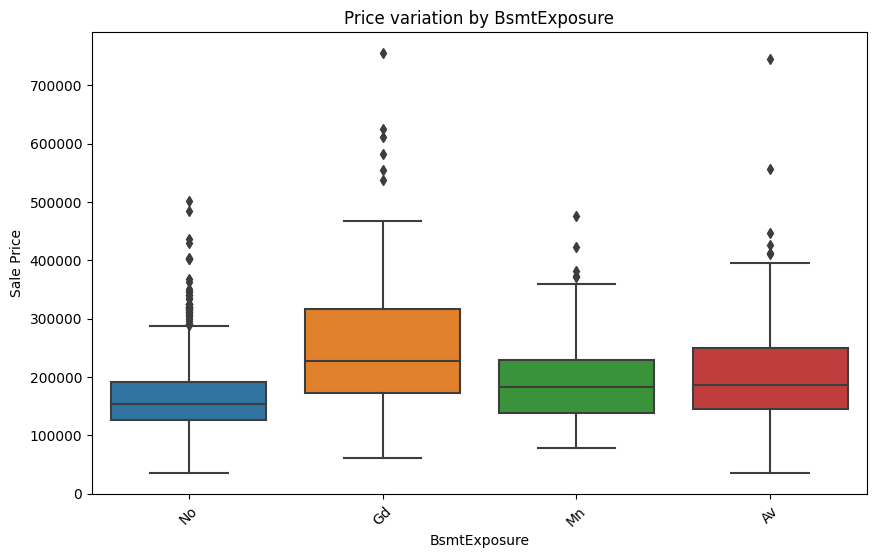

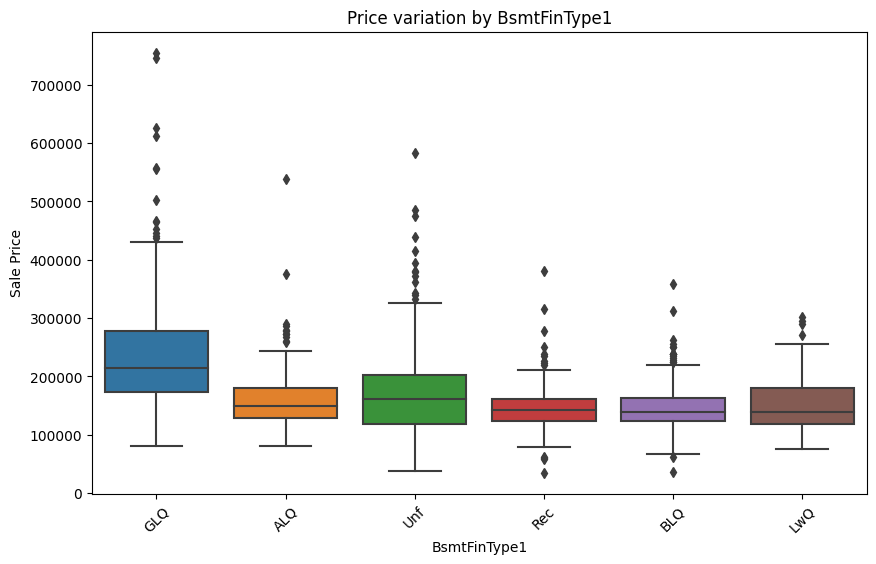

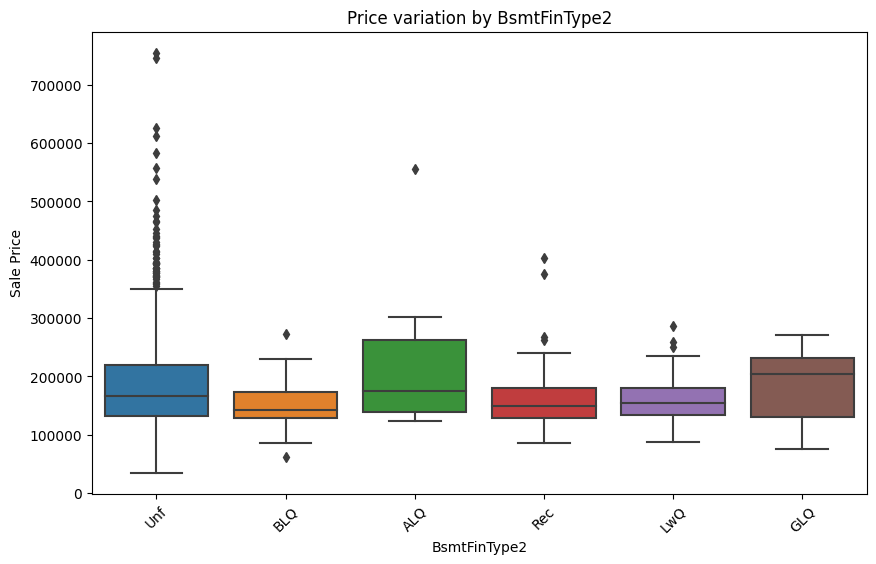

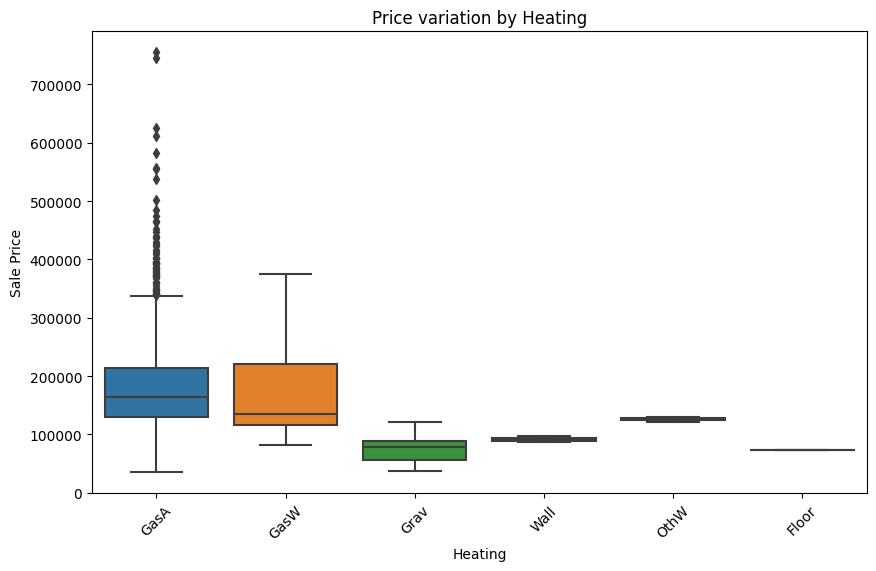

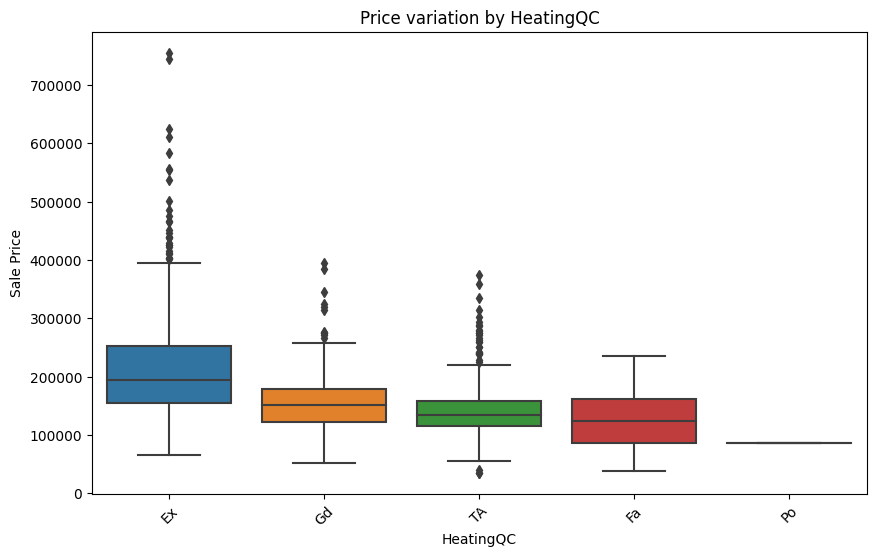

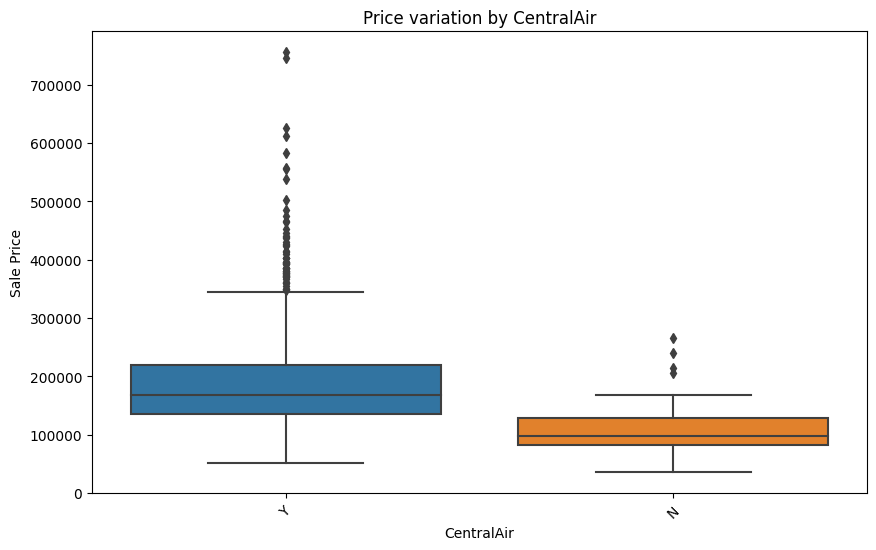

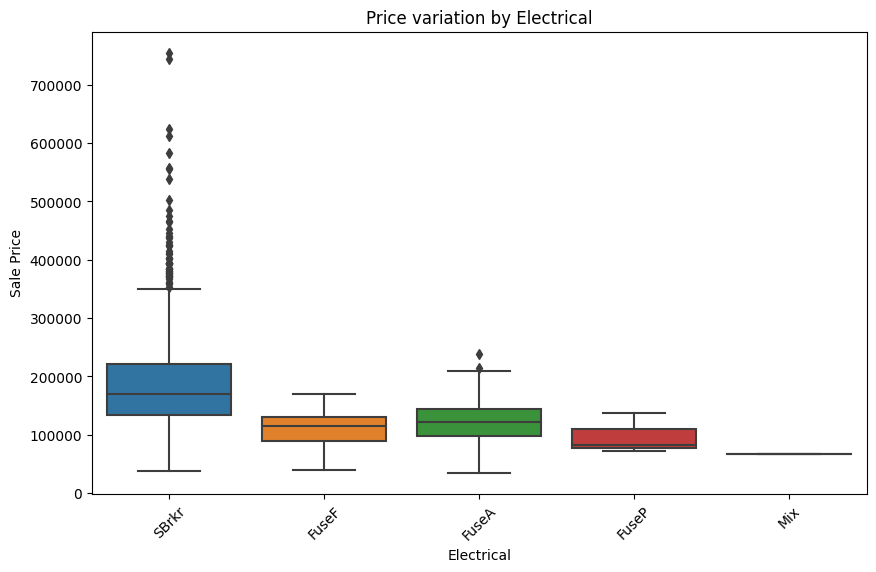

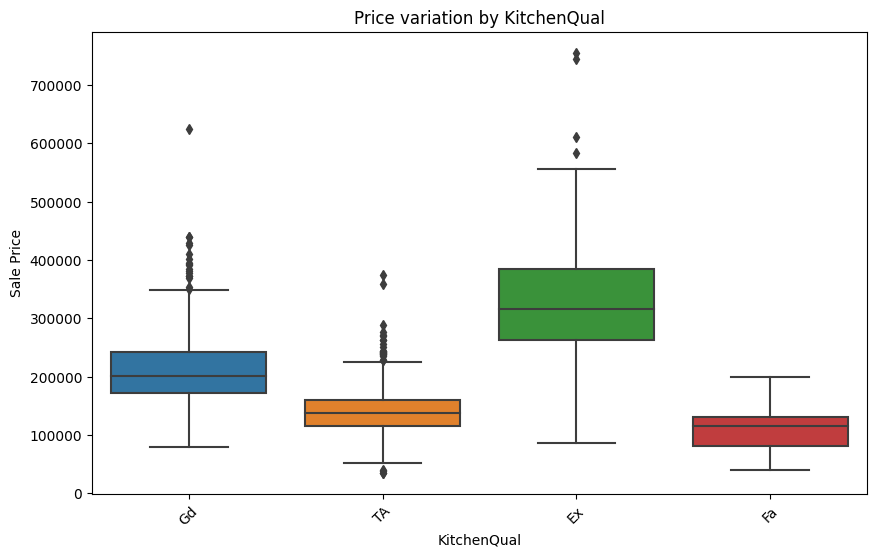

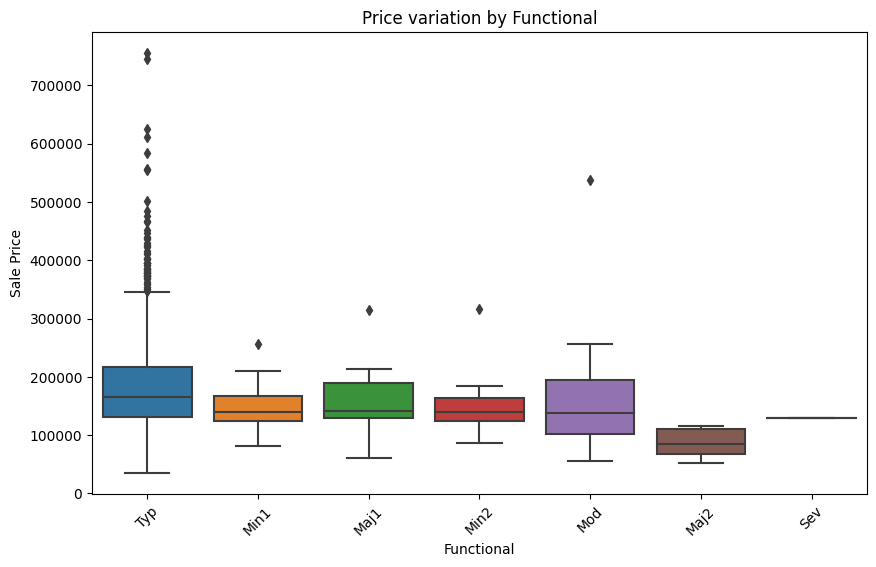

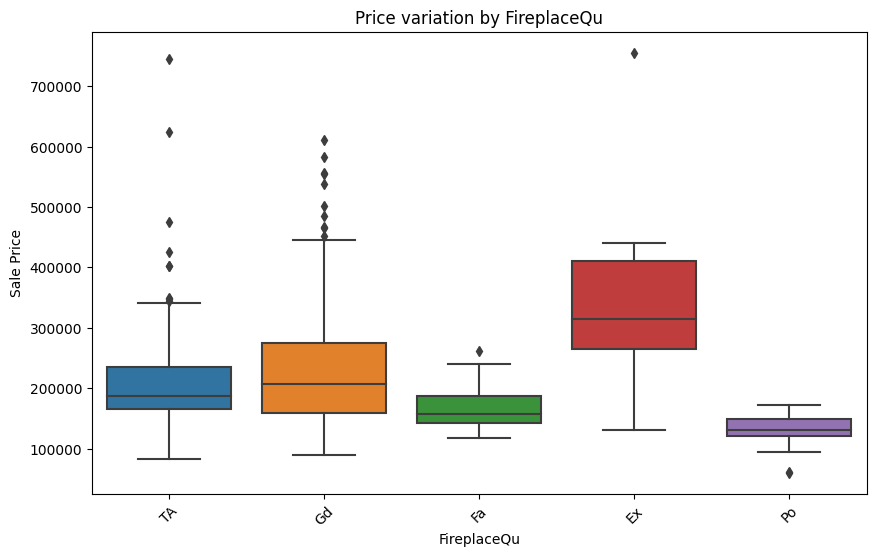

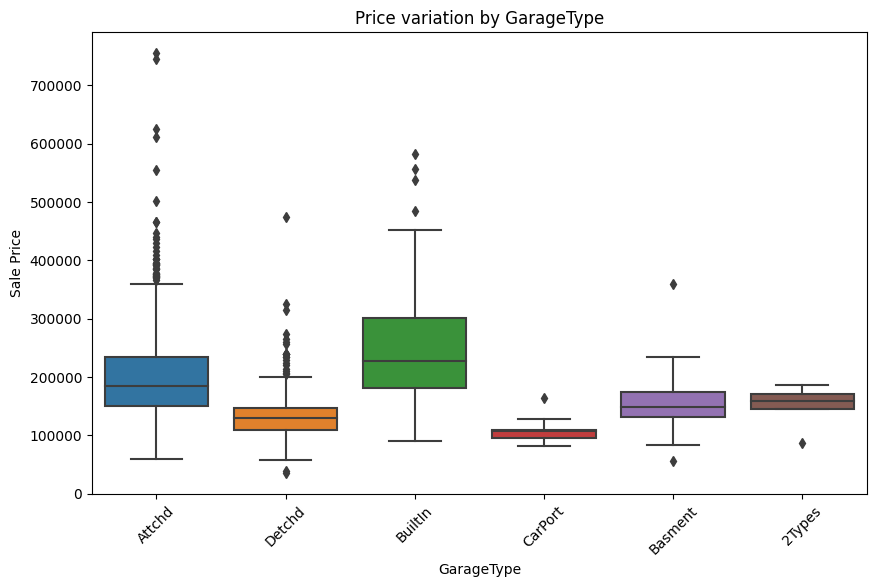

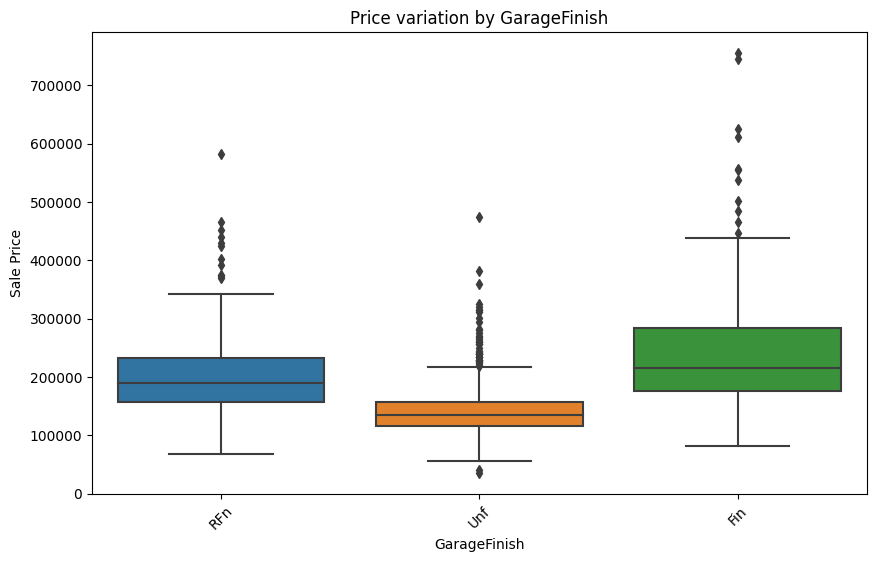

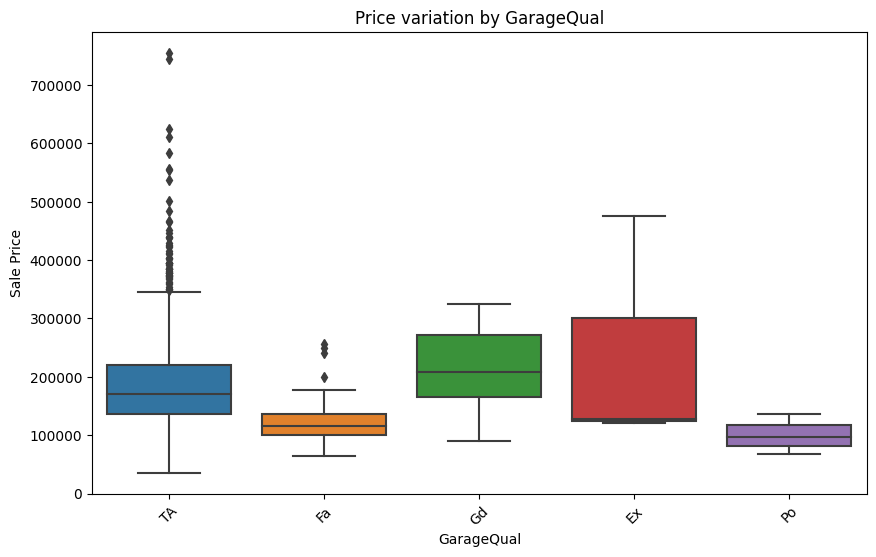

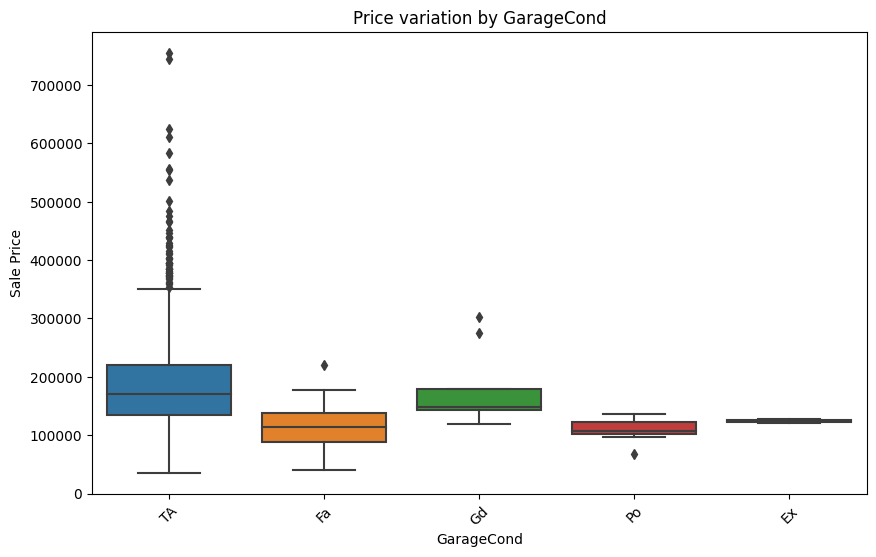

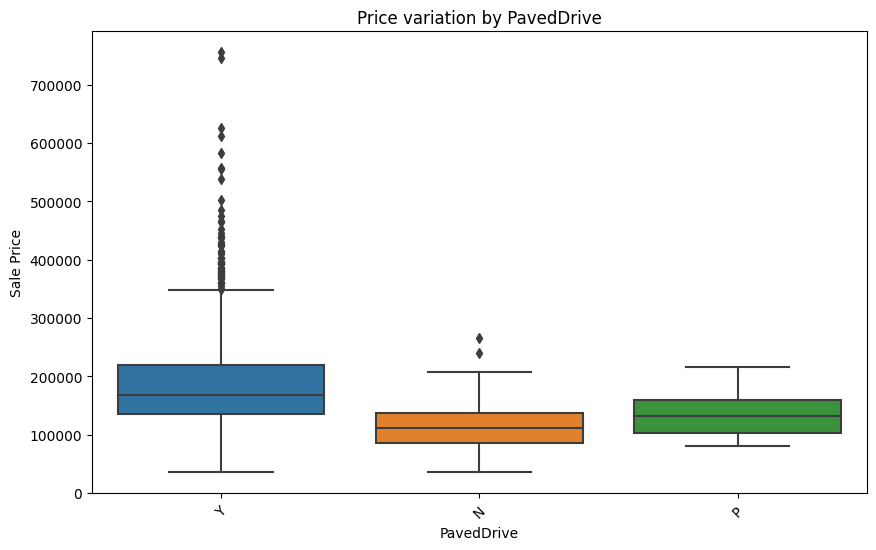

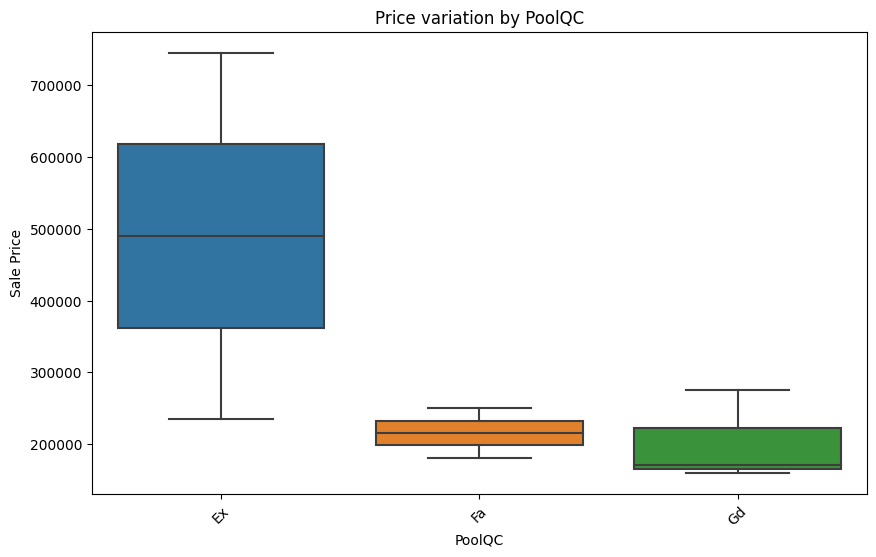

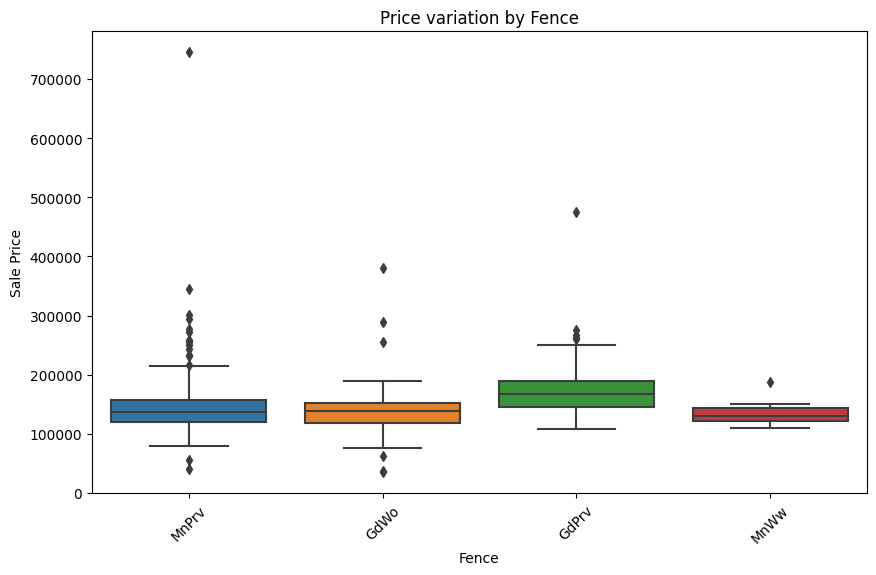

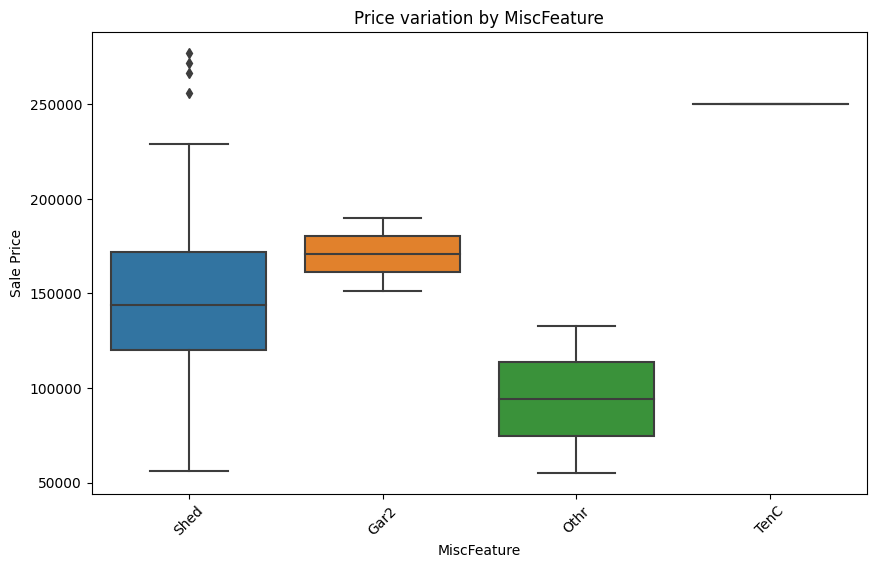

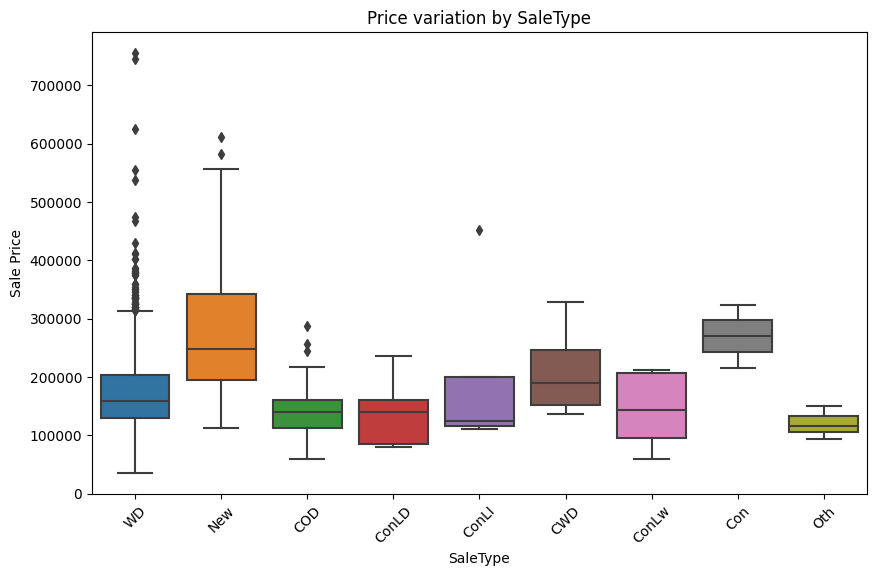

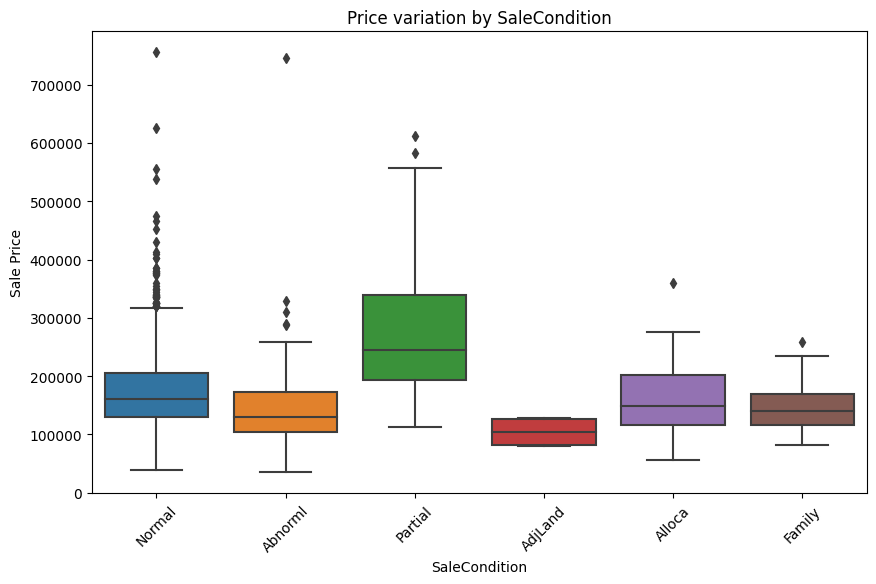

In [104]:
for col in categorical_features.columns :
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=col, y='SalePrice', data=df2)
    plt.title(f'Price variation by {col}')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
    plt.show()

In [105]:
null = categorical_features.isnull().sum()
null_percentage = (null/len(df2))*100
null_percentage[null_percentage > 0 ].sort_values(ascending=False)

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
Electrical       0.068493
dtype: float64

In [106]:
df2.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],inplace=True)
test.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],inplace=True)

In [107]:
null_test = test.select_dtypes(include=['object']).isnull().sum()
null_percentage_test = (null_test/len(df2))*100
null_percentage_test[null_percentage_test > 0 ].sort_values(ascending=False)

GarageFinish    5.342466
GarageQual      5.342466
GarageCond      5.342466
GarageType      5.205479
BsmtCond        3.082192
BsmtQual        3.013699
BsmtExposure    3.013699
BsmtFinType1    2.876712
BsmtFinType2    2.876712
MSZoning        0.273973
Utilities       0.136986
Functional      0.136986
Exterior1st     0.068493
Exterior2nd     0.068493
KitchenQual     0.068493
SaleType        0.068493
dtype: float64

In [108]:
null_percentage_test[null_percentage_test > 0 ].sort_values(ascending=False).shape

(16,)

In [109]:
categorical_features=df2.select_dtypes(include='object')

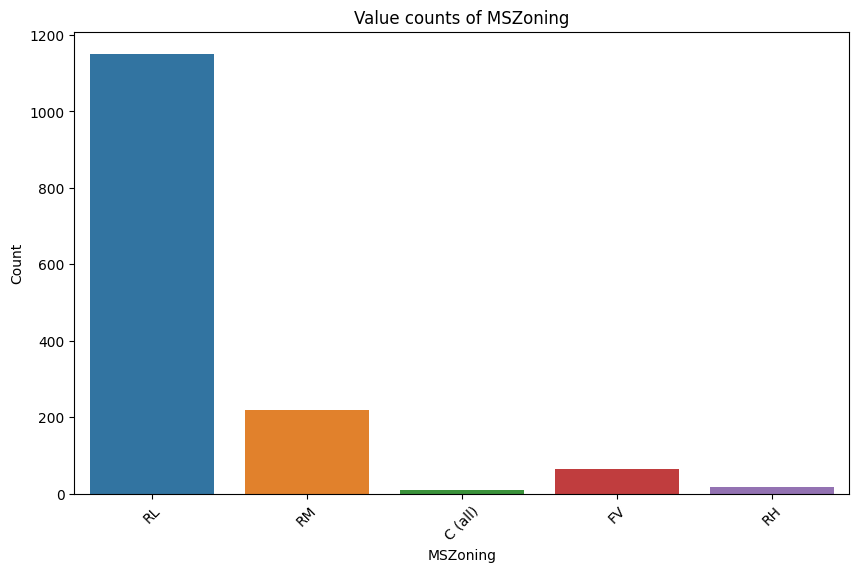

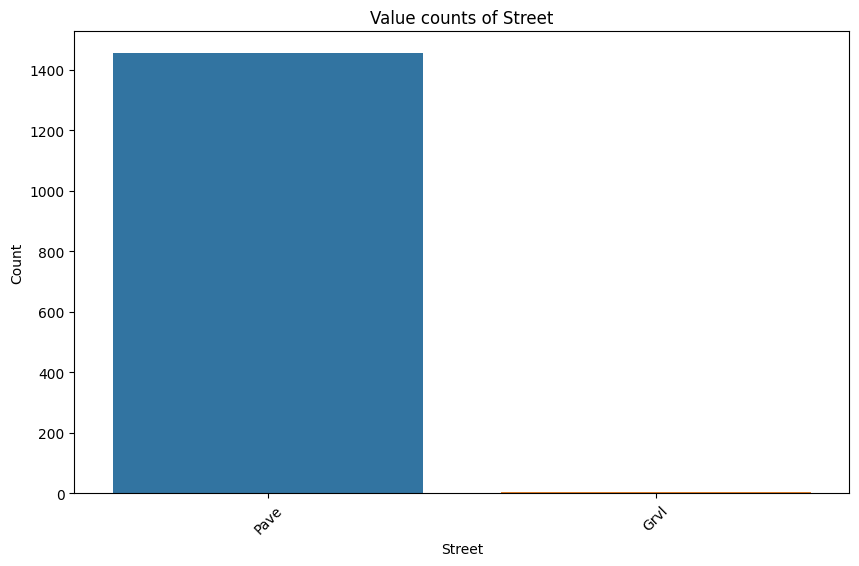

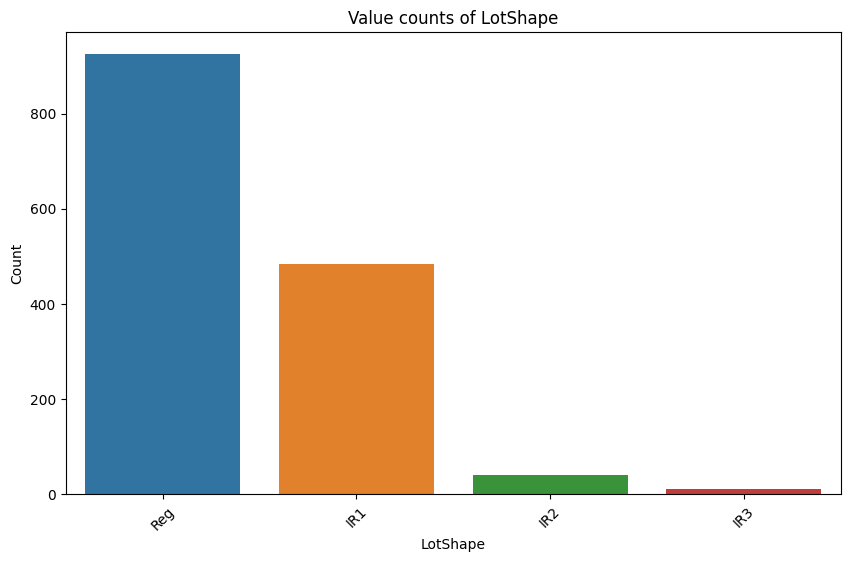

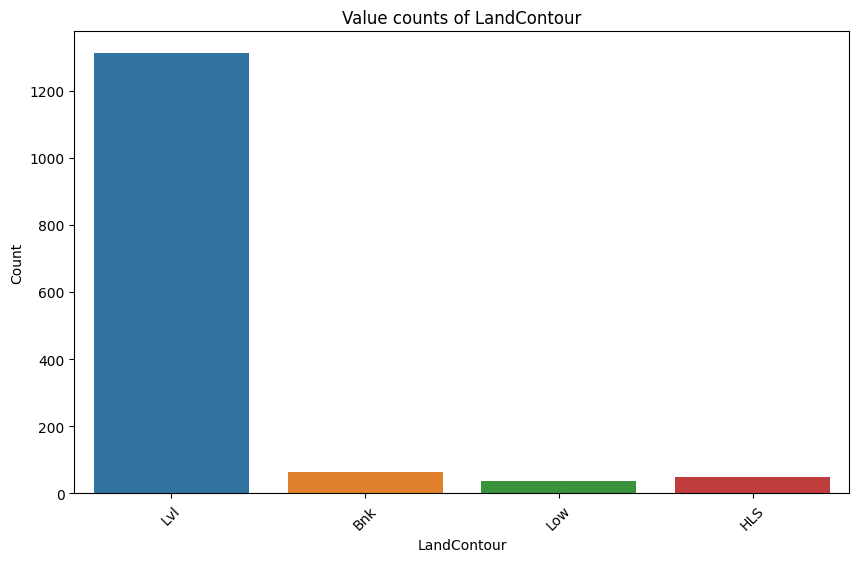

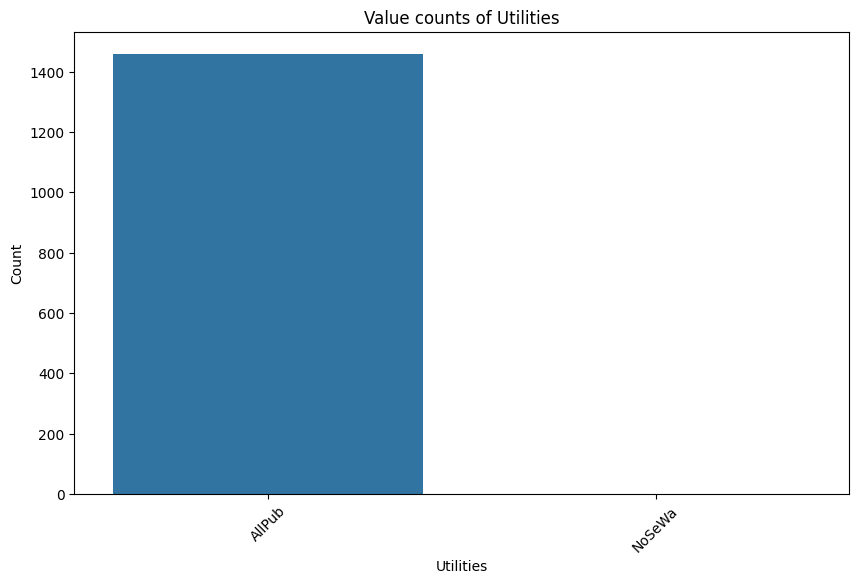

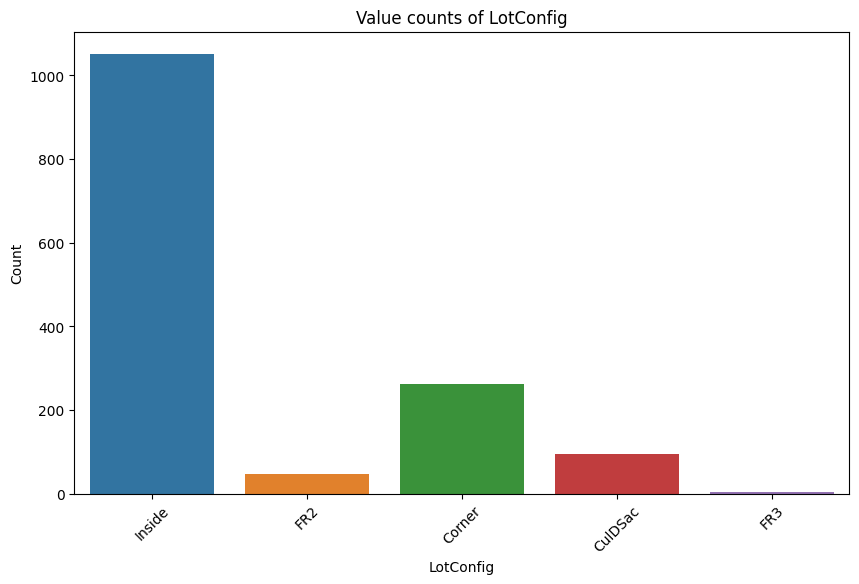

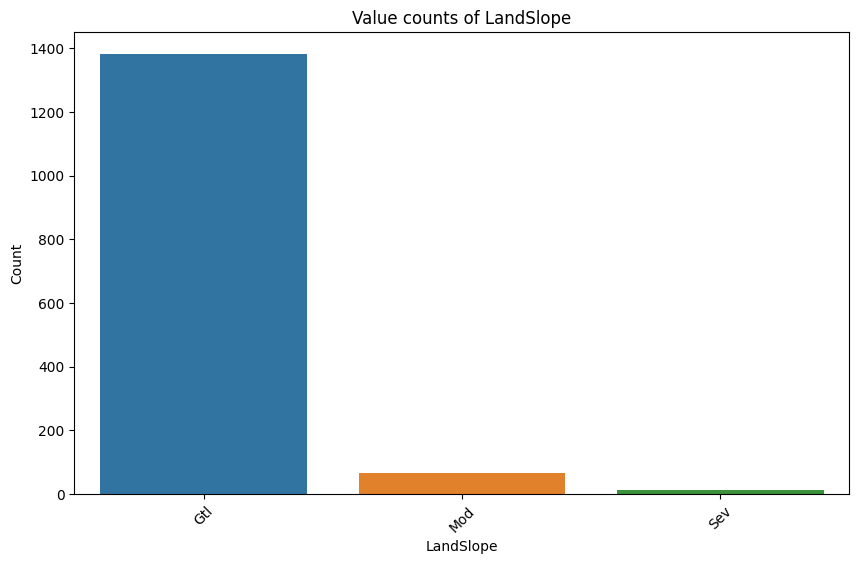

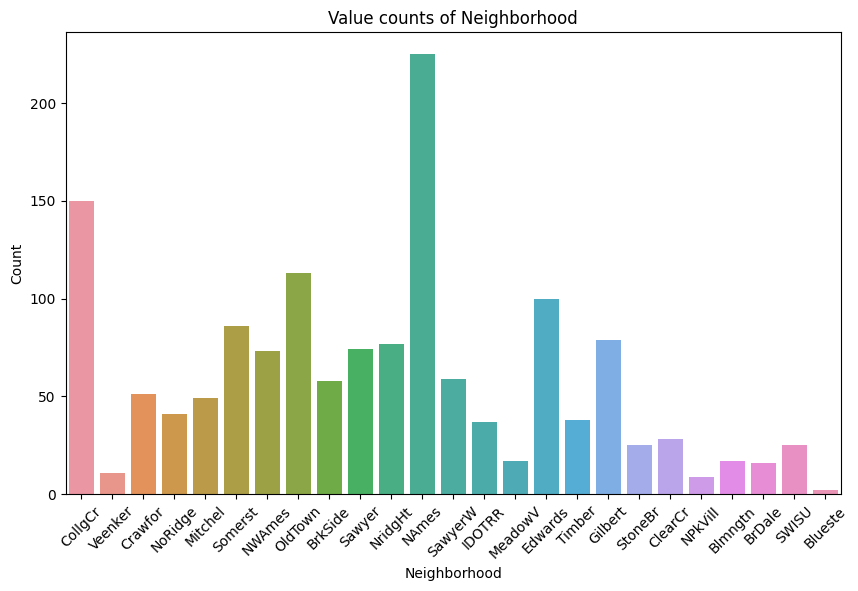

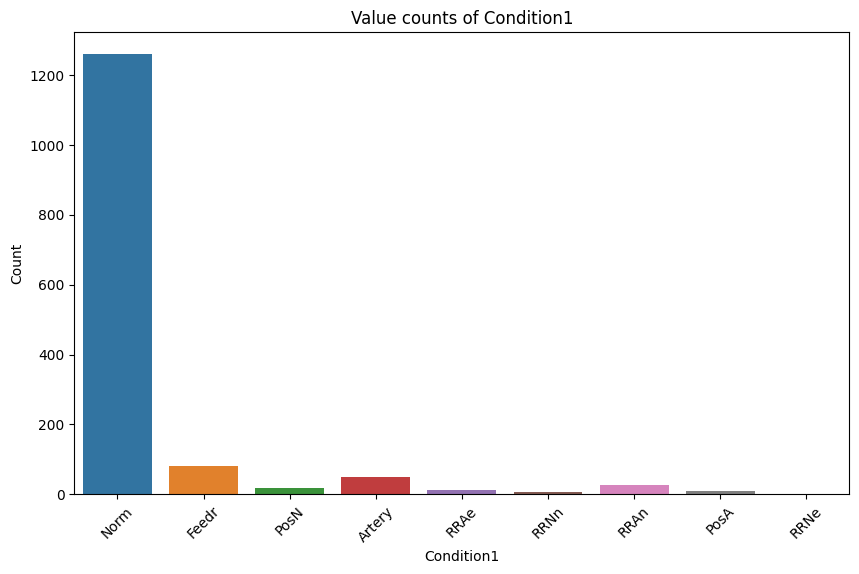

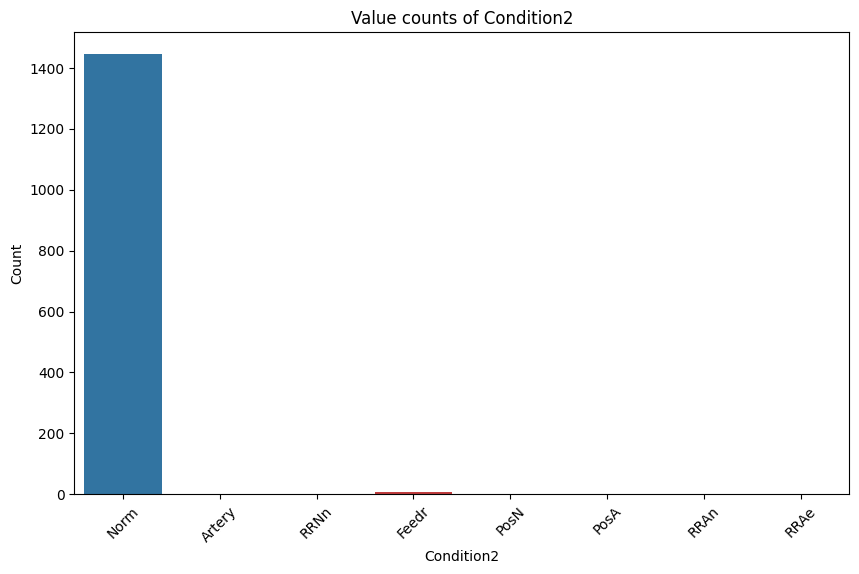

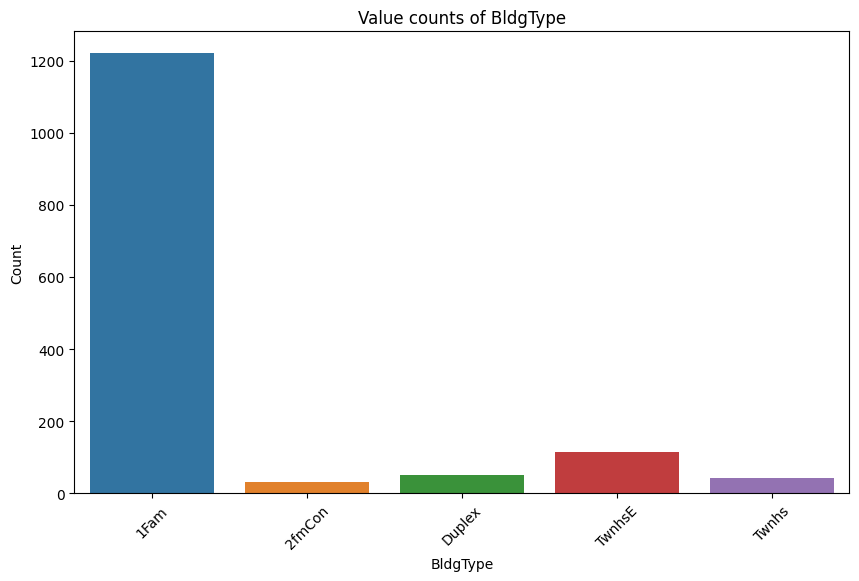

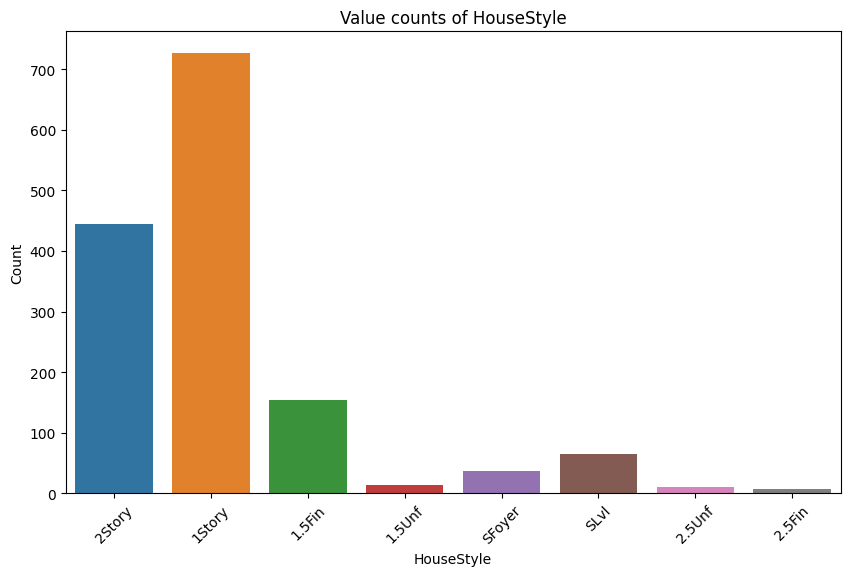

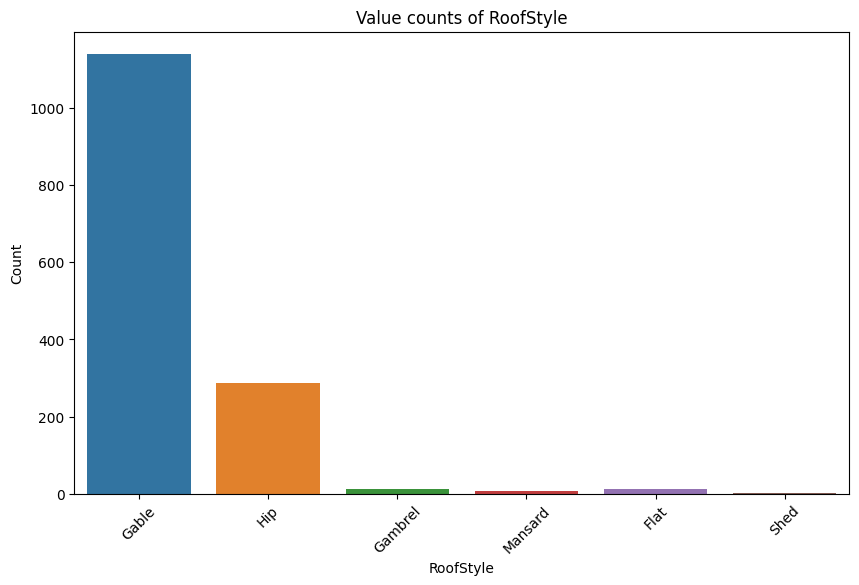

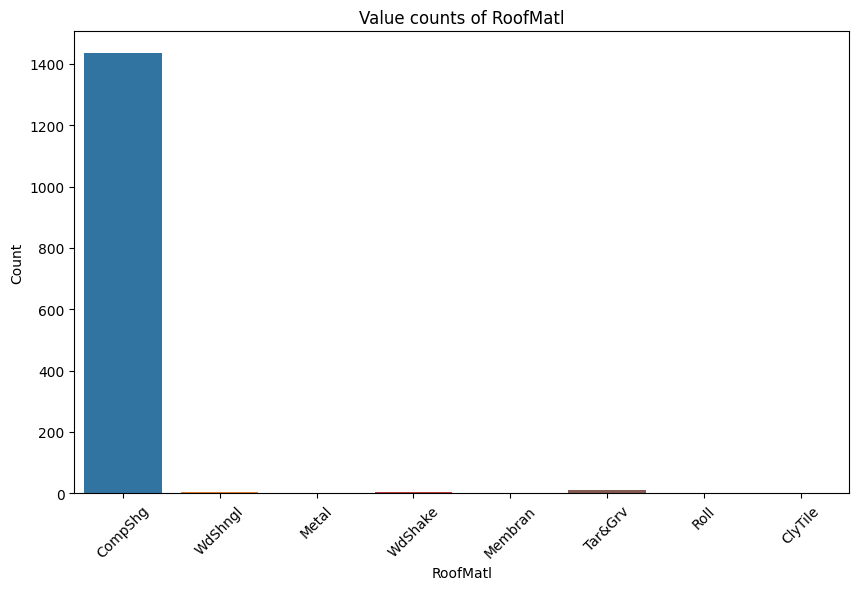

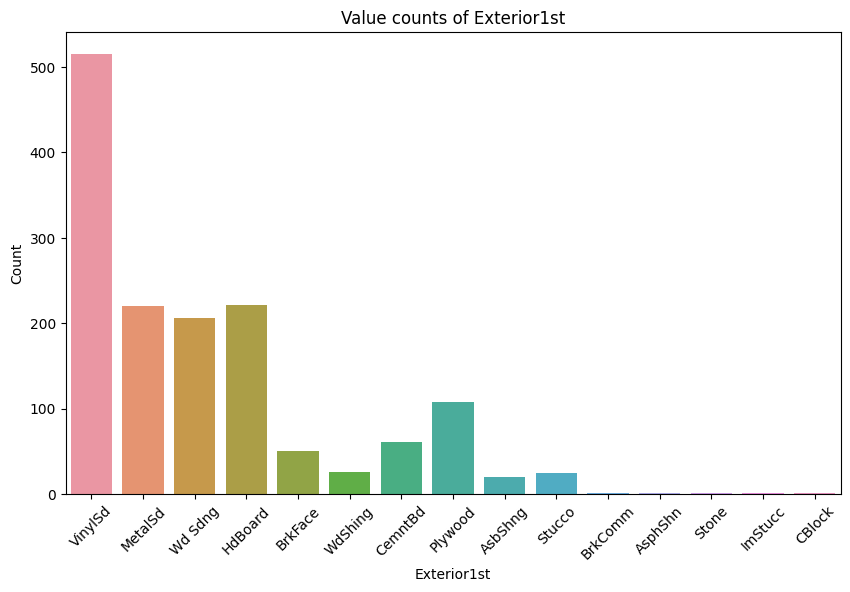

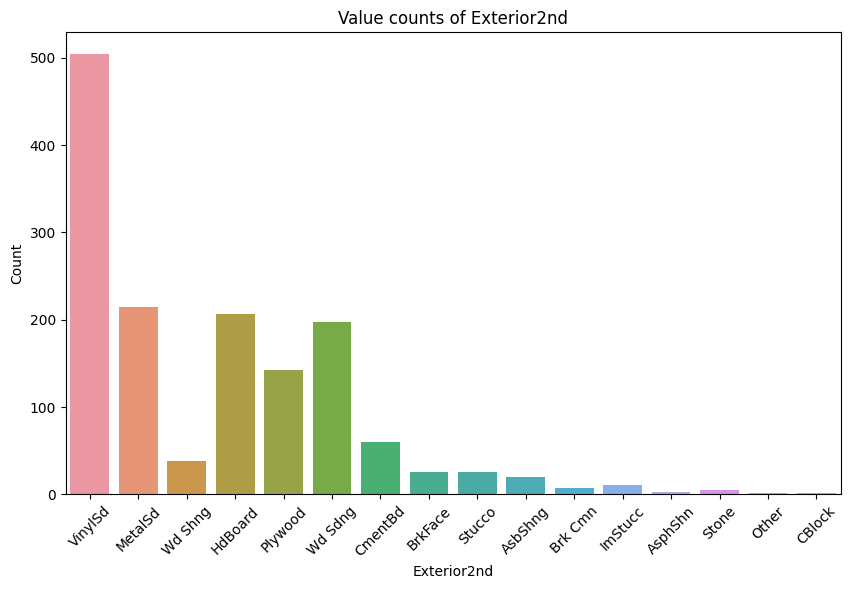

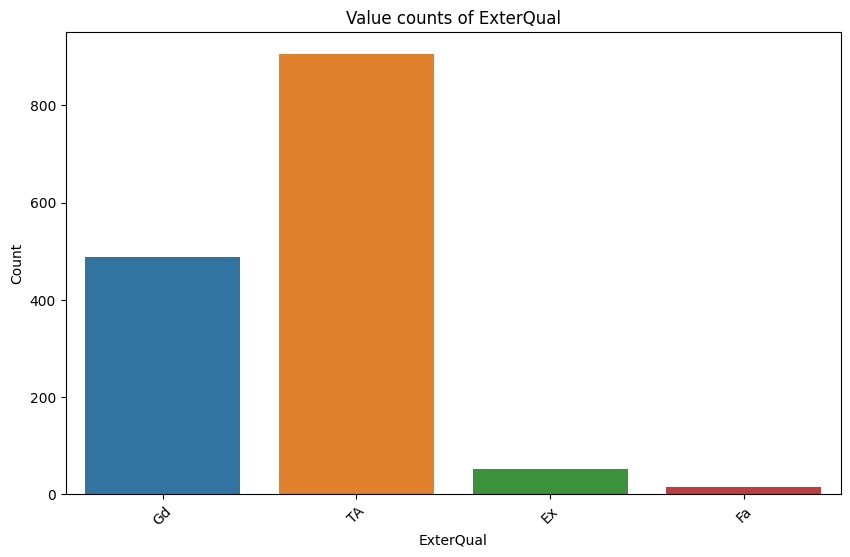

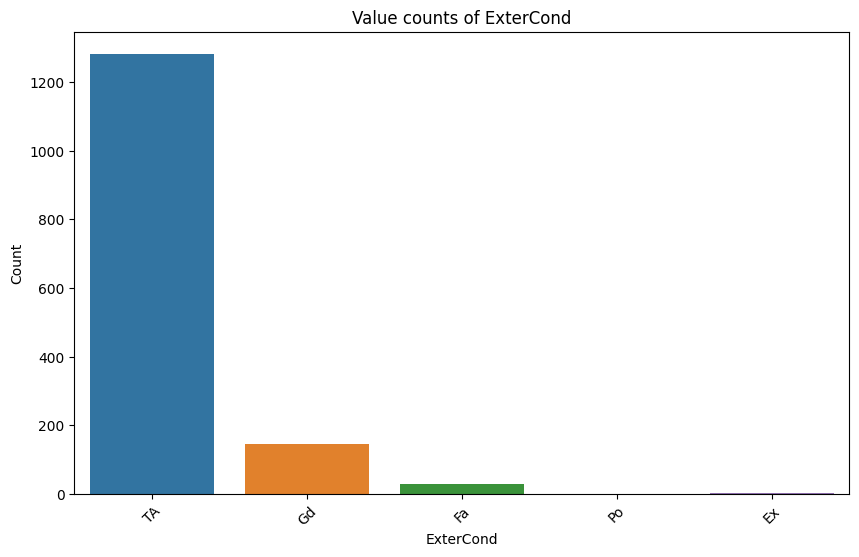

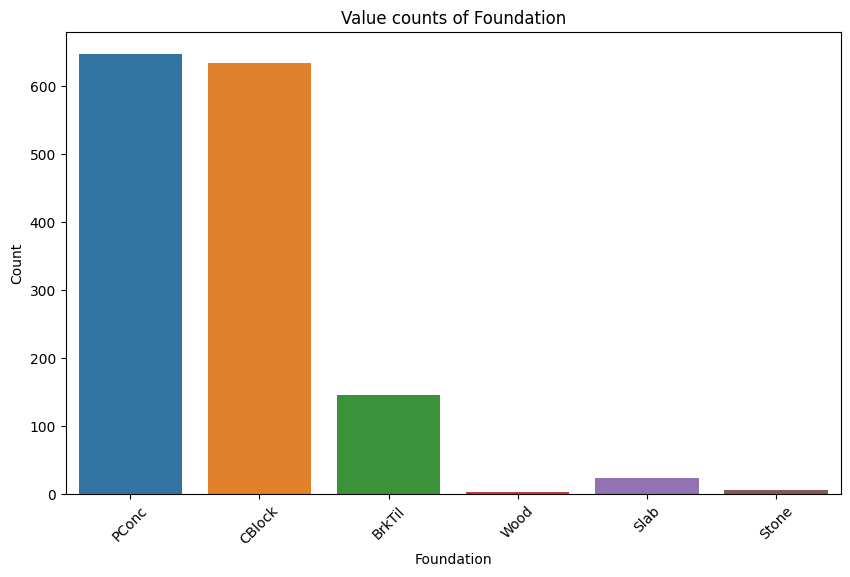

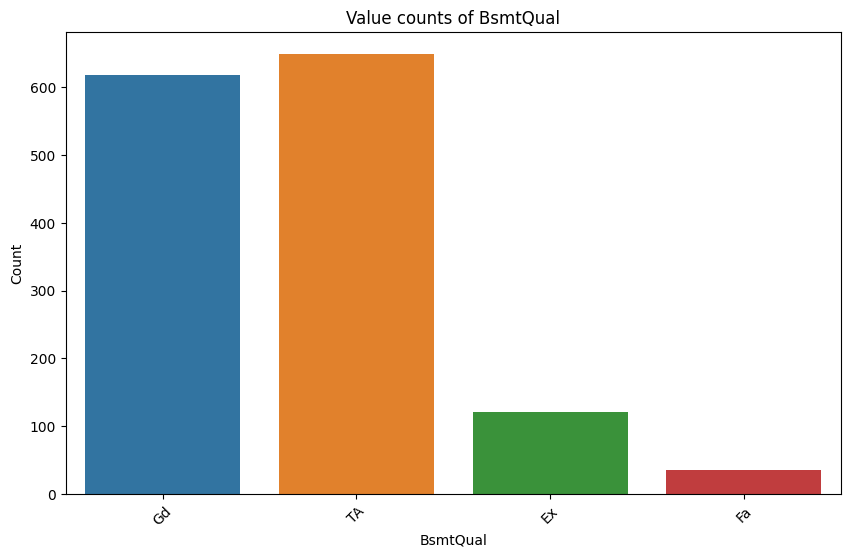

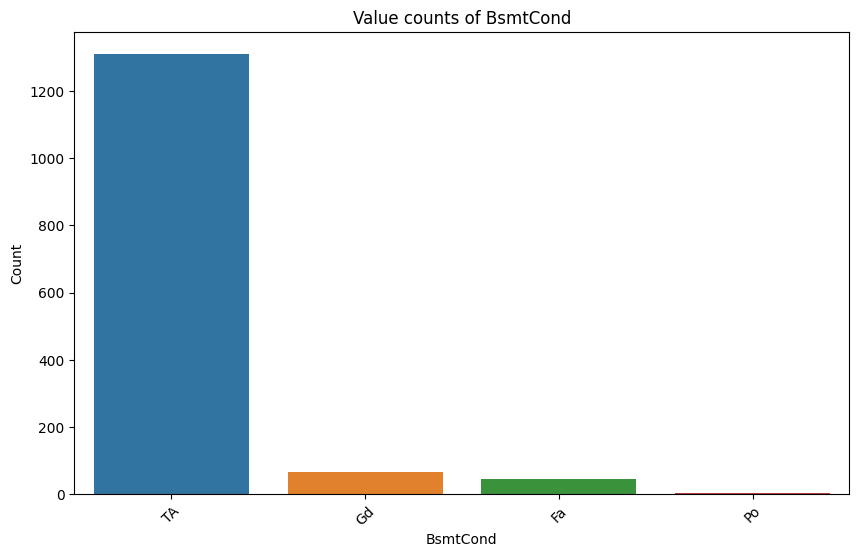

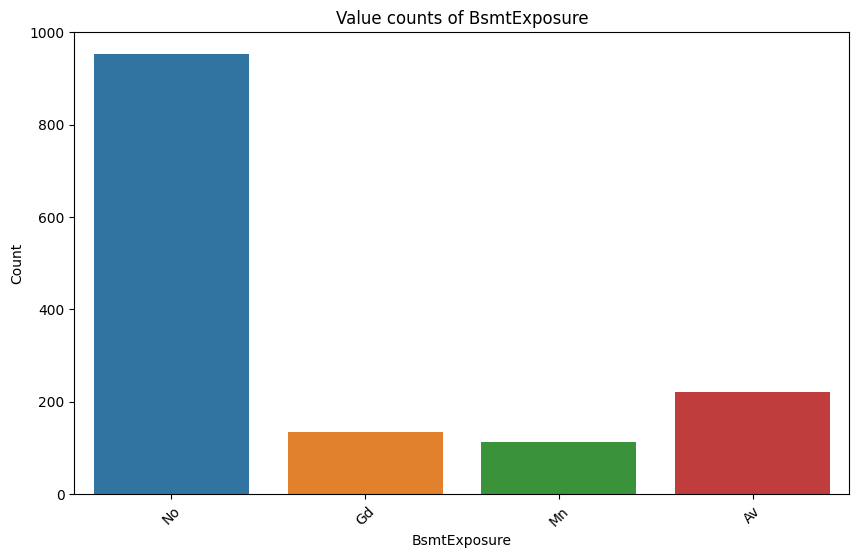

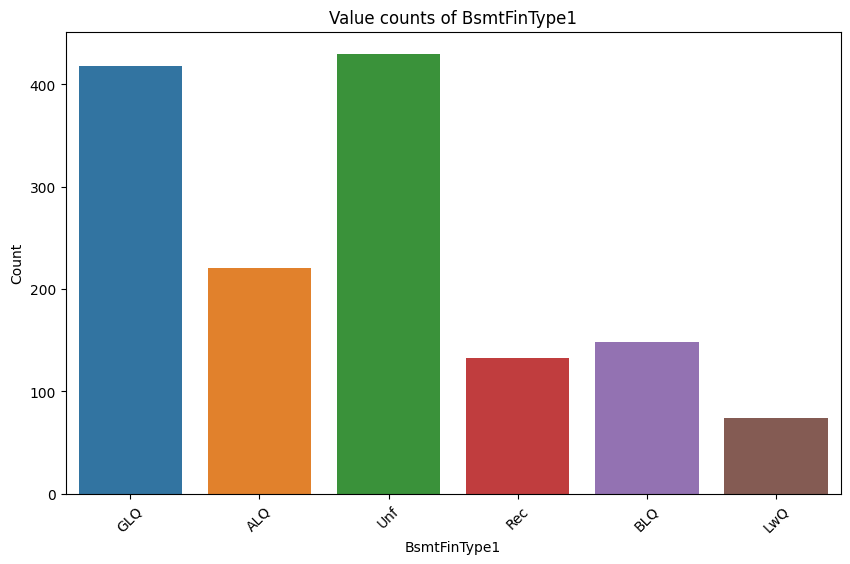

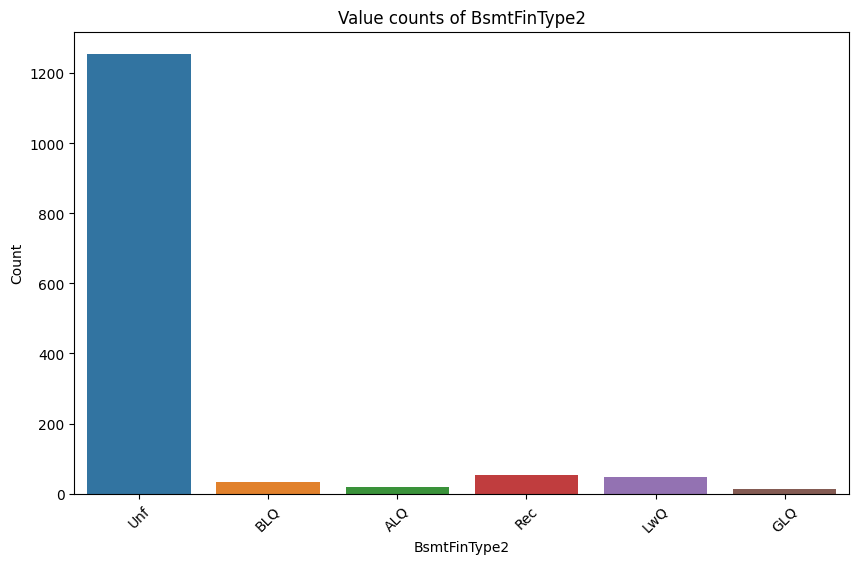

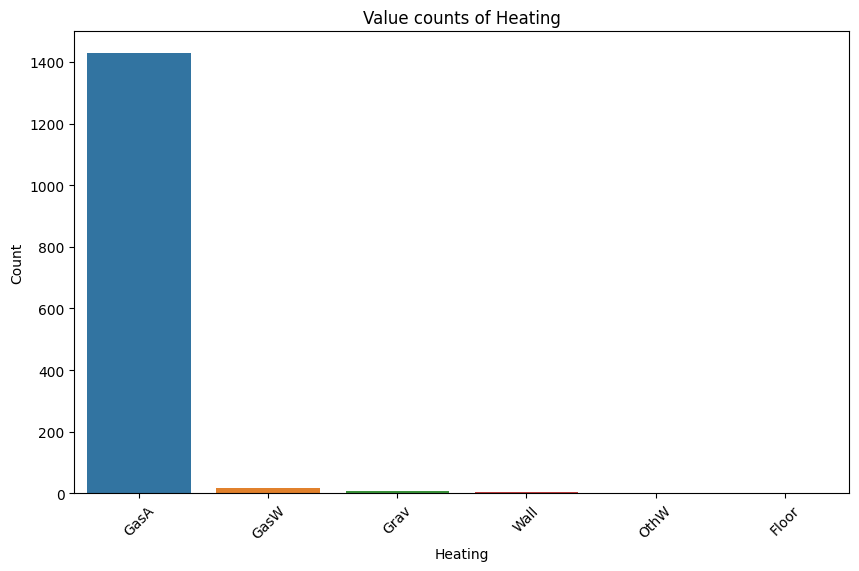

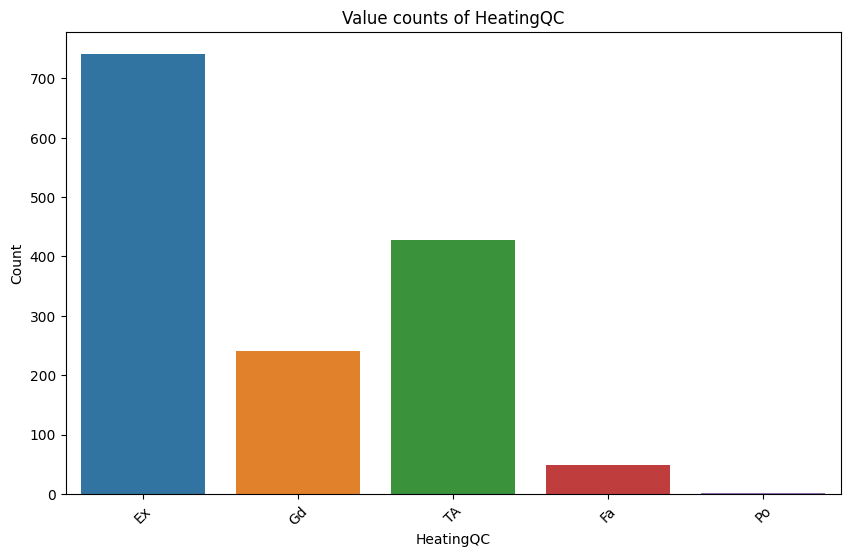

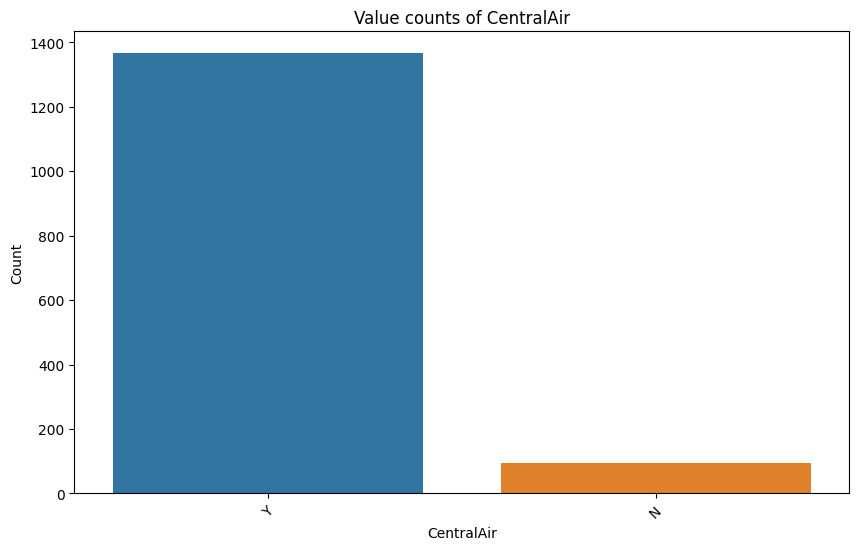

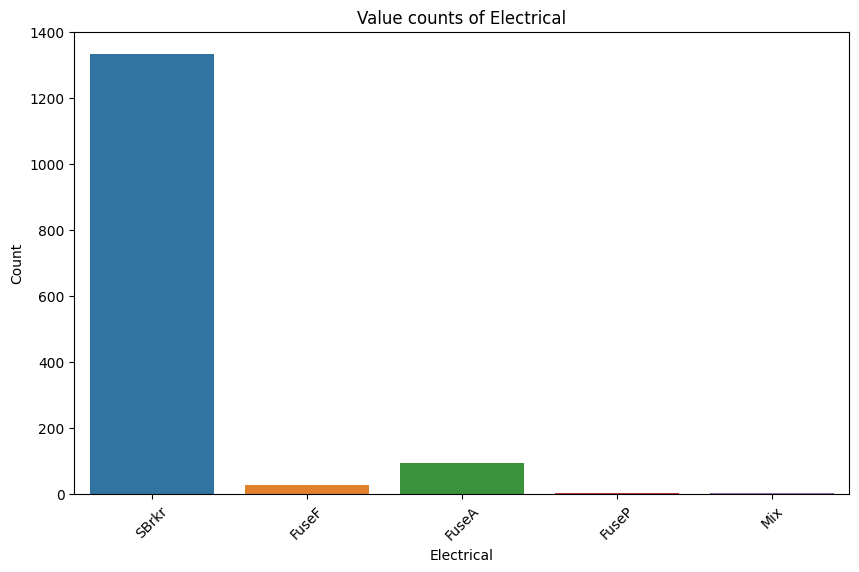

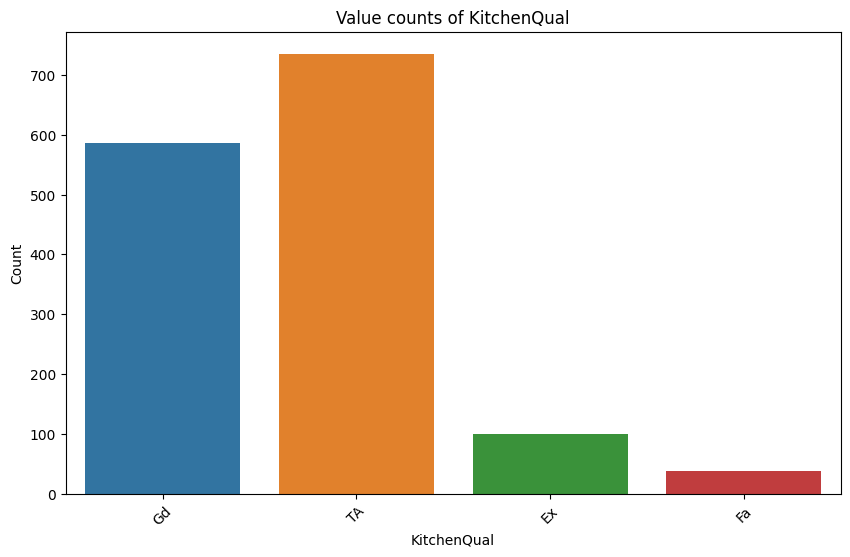

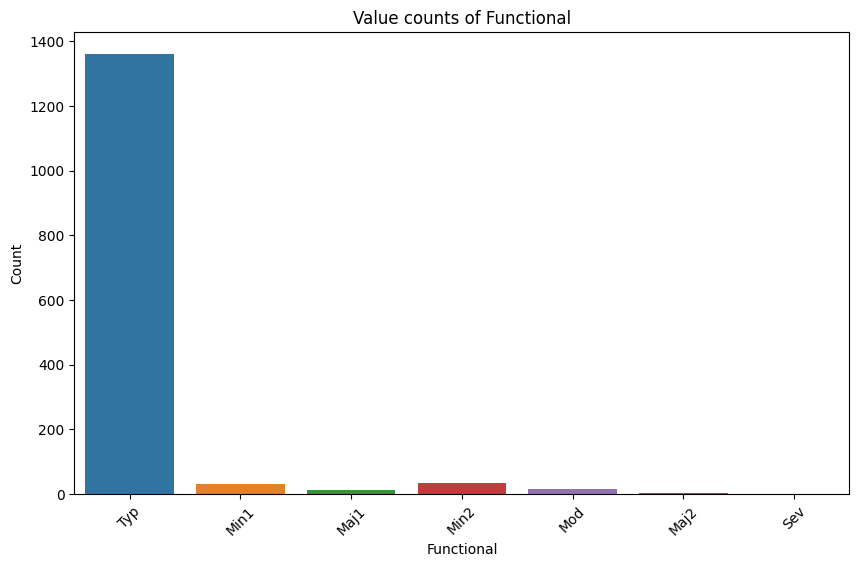

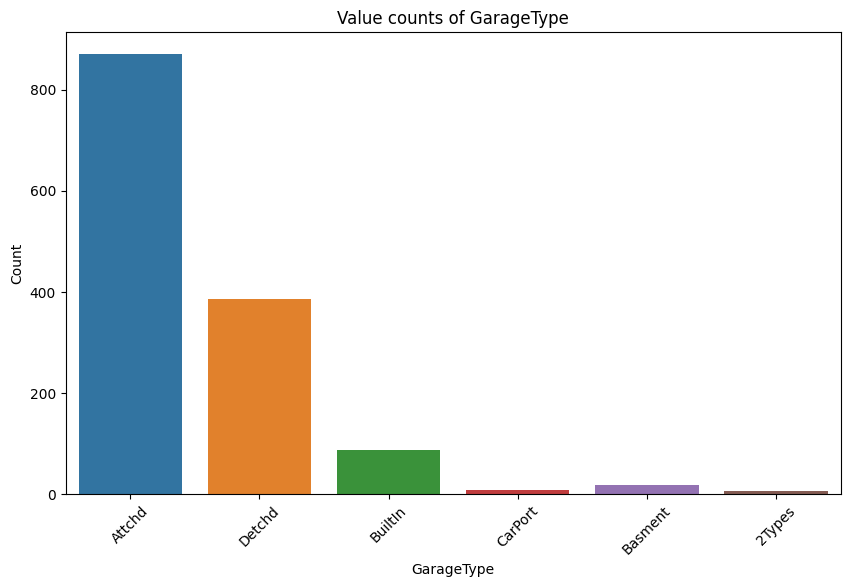

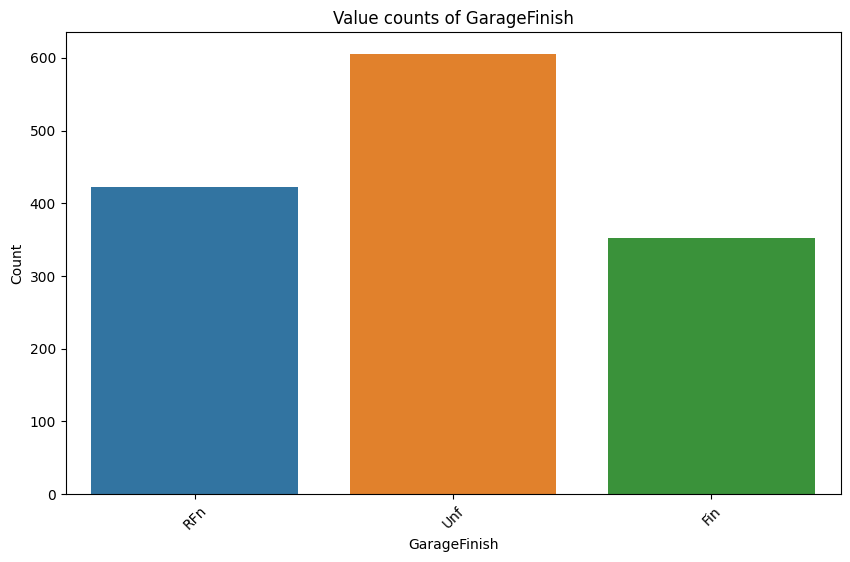

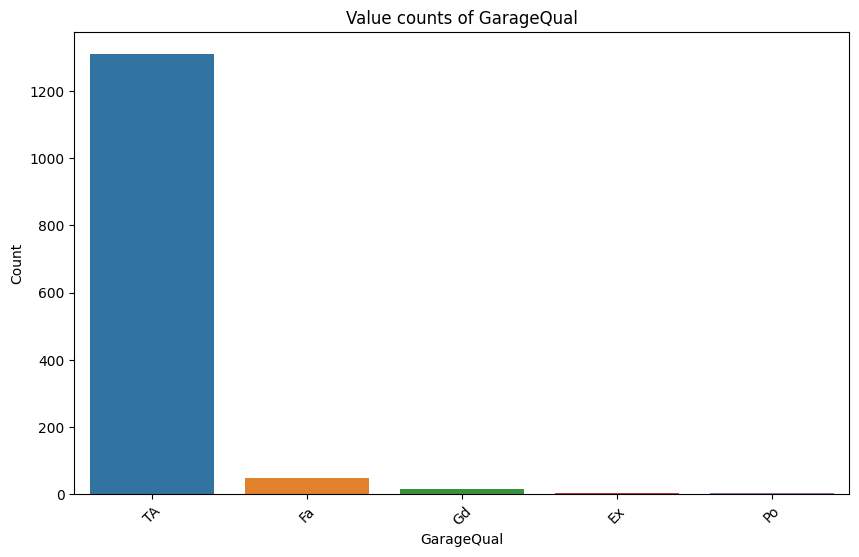

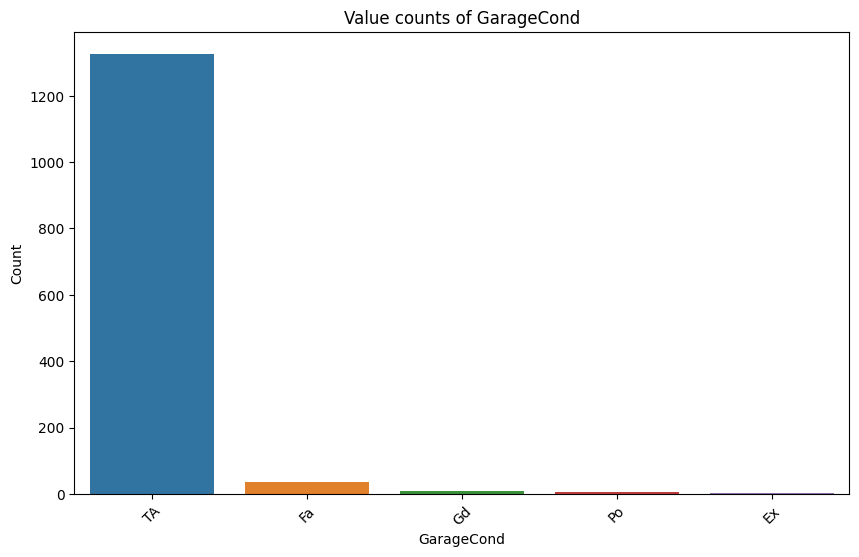

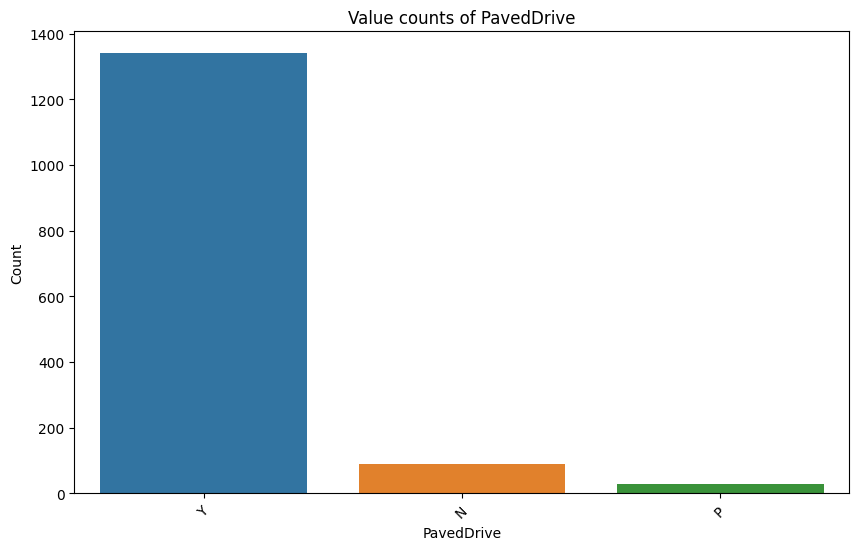

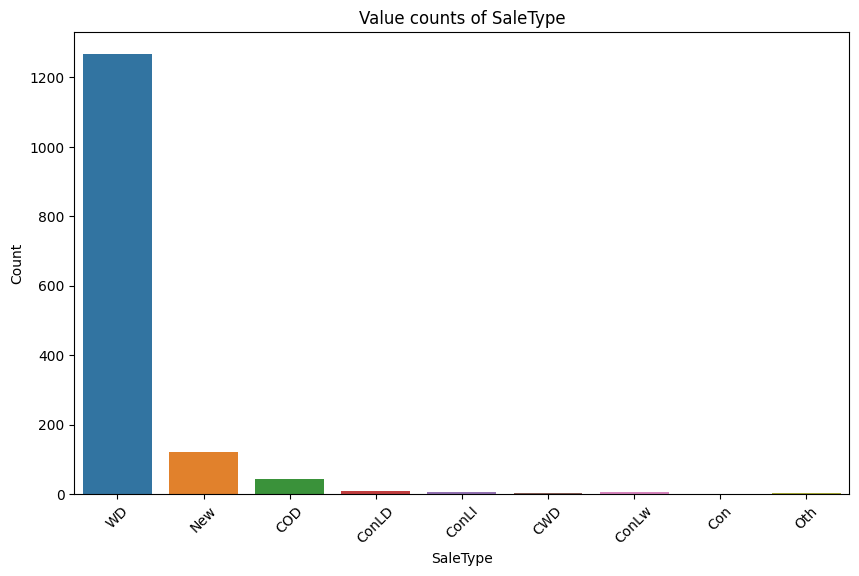

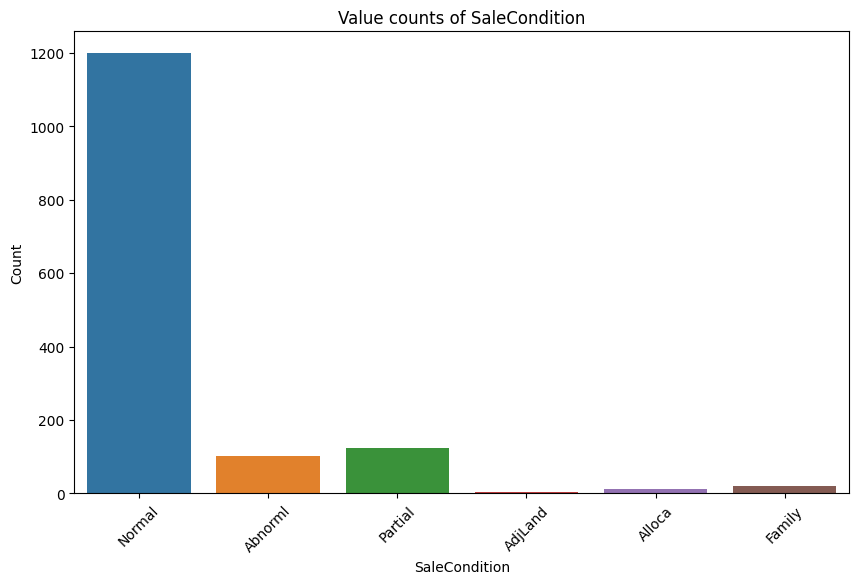

In [110]:
for col in categorical_features.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df2)
    plt.title(f'Value counts of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotation des étiquettes sur l'axe x pour une meilleure lisibilité
    plt.show()

In [111]:
columns_with_same_values = []
total_rows = len(categorical_features)
    
for col in categorical_features.columns:
    most_common_value_count = categorical_features[col].value_counts().max()
    proportion_most_common_value = most_common_value_count / total_rows
        
    if proportion_most_common_value > 0.9:
        columns_with_same_values.append(col)
    
columns_with_same_values

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageCond',
 'PavedDrive']

In [112]:
df2.drop(columns=columns_with_same_values,inplace=True)
test.drop(columns=columns_with_same_values,inplace=True)

**Adressing null Values for categorical Features**

In [113]:
null = df2.select_dtypes(include=['object']).isnull().sum()
null_percentage = (null/len(df2))*100
null_percentage[null_percentage > 0 ].sort_values(ascending=False)

GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
BsmtExposure    2.602740
BsmtFinType2    2.602740
BsmtQual        2.534247
BsmtCond        2.534247
BsmtFinType1    2.534247
dtype: float64

In [114]:
null_test = test.select_dtypes(include=['object']).isnull().sum()
null_percentage_test = (null_test/len(df2))*100
null_percentage_test[null_percentage_test > 0 ].sort_values(ascending=False)

GarageFinish    5.342466
GarageQual      5.342466
GarageType      5.205479
BsmtCond        3.082192
BsmtQual        3.013699
BsmtExposure    3.013699
BsmtFinType1    2.876712
BsmtFinType2    2.876712
MSZoning        0.273973
Exterior1st     0.068493
Exterior2nd     0.068493
KitchenQual     0.068493
SaleType        0.068493
dtype: float64

In [115]:
df2['GarageType'] = df2['GarageType'].fillna('No Garage')
df2['GarageFinish'] = df2['GarageFinish'].fillna('No Garage')
df2['GarageQual'] = df2['GarageQual'].fillna('No Garage')
df2['BsmtQual'] = df2['BsmtQual'].fillna('No Basement')
df2['BsmtCond'] = df2['BsmtCond'].fillna('No Basement')
df2['BsmtExposure'] = df2['BsmtExposure'].fillna('No Basement')
df2['BsmtFinType1'] = df2['BsmtFinType1'].fillna('No Basement')
df2['BsmtFinType2'] = df2['BsmtFinType2'].fillna('No Basement')

test['GarageType'] = test['GarageType'].fillna('No Garage')
test['GarageFinish'] = test['GarageFinish'].fillna('No Garage')
test['GarageQual'] = test['GarageQual'].fillna('No Garage')
test['BsmtQual'] = test['BsmtQual'].fillna('No Basement')
test['BsmtCond'] = test['BsmtCond'].fillna('No Basement')
test['BsmtExposure'] = test['BsmtExposure'].fillna('No Basement')
test['BsmtFinType1'] = test['BsmtFinType1'].fillna('No Basement')
test['BsmtFinType2'] = test['BsmtFinType2'].fillna('No Basement')
test['MSZoning'].fillna('RL',inplace=True)
test['Exterior1st'].fillna('VinylSd' , inplace=True)
test['Exterior2nd'].fillna('VinylSd',inplace=True)
test['KitchenQual'].fillna('TA',inplace=True)
test['SaleType'].fillna('WD' ,inplace=True)

/tmp/ipykernel_33/1402822821.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['MSZoning'].fillna('RL',inplace=True)
/tmp/ipykernel_33/1402822821.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [116]:
null=df2.isnull().sum()
null[null>0]

Series([], dtype: int64)

In [117]:
null_test=test.isnull().sum()
null_test[null_test>0]

Series([], dtype: int64)

**Encoding Categorical Features And Standarization of numerical Features**

In [118]:
categorical_features=df2.select_dtypes(include='object')

In [119]:
categorical_features.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
       'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [120]:
onehot = ['MSZoning' , 'Neighborhood' , 'Condition1' , 
          'HouseStyle','RoofStyle' , 'Exterior1st', 'Exterior2nd','Foundation' ,'GarageType','SaleType','SaleCondition','LotConfig']
ordinal = ['LotShape' , 'ExterQual' ,'ExterCond','BsmtQual' , 'BsmtCond' ,'BsmtExposure','BsmtFinType1' ,'BsmtFinType2'
           ,'HeatingQC' , 'KitchenQual','GarageFinish','GarageQual','LandContour','BldgType']
num=list(test.select_dtypes(np.number).columns)

In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder , OrdinalEncoder

In [122]:
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('hotencoder', OneHotEncoder())
])
ordinal_transformer=Pipeline(steps=[
    ('ordencoder',OrdinalEncoder())
])

In [123]:
y=df2.SalePrice
df2.drop(columns='SalePrice',inplace=True)

In [124]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num),
        ('cat', categorical_transformer, onehot),
        ('ord',ordinal_transformer,ordinal)
    ],remainder = 'passthrough')

In [125]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)])

In [126]:
X_train=df2

In [127]:
X_encoded_train=pipeline.fit_transform(X_train)

In [128]:
X_encoded_train.shape

(1460, 155)

In [129]:
X_encoded_test=pipeline.transform(test)

In [130]:
X_encoded_test.shape

(1459, 155)

In [131]:
y_train=np.log(y)

**Model Building**

In [132]:
from sklearn.model_selection import KFold, cross_val_score , GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [133]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'Support Vector Machine': SVR()
}
param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Decision Tree': {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Random Forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]},
    'Support Vector Machine': {'kernel': ['linear', 'rbf'], 'C': [0.1, 1.0, 10.0]}
}

In [134]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [135]:
results = []
grids = {}
for model_name, model in models.items():
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_encoded_train, y_train)
    best_params =  grids[model_name].best_params_
    best_score =(-1 * grids[model_name].best_score_)
    results.append({'Model': model_name, 'Best Score': best_score})
# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [136]:
results

[{'Model': 'Linear Regression', 'Best Score': 5.551191988558513e+20},
 {'Model': 'Ridge Regression', 'Best Score': 0.02457797738123765},
 {'Model': 'Lasso Regression', 'Best Score': 0.048570429242717476},
 {'Model': 'Decision Tree', 'Best Score': 0.04320129143286602},
 {'Model': 'Random Forest', 'Best Score': 0.022619574251148078},
 {'Model': 'Gradient Boosting', 'Best Score': 0.019618545764013295},
 {'Model': 'XGBoost', 'Best Score': 0.021645441125262763},
 {'Model': 'Support Vector Machine', 'Best Score': 0.017890830397103798}]

In [137]:
best_score

0.017890830397103798

In [138]:
best_params

{'C': 1.0, 'kernel': 'rbf'}

In [146]:
best_model = grids['Support Vector Machine'].best_estimator_

In [147]:
test2

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN        Gar2   12500   
2            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            HLS    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition      SalePrice  
0         6   2010        WD         Normal  108626.027820  
1         6   2010        WD         Normal  166808.651441  
2         3   2010        WD         Normal  185476.473464  
3         6   2010        WD         Normal  187953.672901  
4         1   2010        WD         Normal  183389.118851  
...     ...    ...       ...            ...            ...  
1454      6   2006        WD         Normal   78976.473057  
1455      4   2006        WD        Abnorml   76128.997521  
1456      9   2006        WD        Abnorml  159301.583898  
1457      7   2006        WD         Normal  111728.491527  
1458     11   2006        WD         Normal  224675.158213  

[1459 rows x 81 columns]

In [148]:
predictions=best_model.predict(X_encoded_test)

In [149]:
predictions=np.exp(predictions)

In [150]:
test2['SalePrice']=predictions

In [151]:
to_submit=test2[['Id','SalePrice']]
to_submit.head()

Id      SalePrice
0  1461  119102.691570
1  1462  156366.267912
2  1463  185229.759170
3  1464  190674.581653
4  1465  184957.990085

In [154]:
to_submit.to_csv('submission2.csv',index=False)

**Apply PCA**

In [174]:
from sklearn.decomposition import PCA

# Initialize PCA with the desired explained variance ratio
pca = PCA(n_components=0.95)

# Fit PCA to your encoded features
pca.fit(X_encoded_train)

# Transform your encoded features using the learned transformation
X_encoded_pca_train = pca.transform(X_encoded_train)

In [175]:
X_encoded_pca_test=pca.transform(X_encoded_test)

In [176]:
results = []
grids = {}
for model_name, model in models.items():
    grids[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=kf, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids[model_name].fit(X_encoded_pca_train, y_train)
    best_params =  grids[model_name].best_params_
    best_score =(-1 * grids[model_name].best_score_)
    results.append({'Model': model_name, 'Best Score': best_score})
# Créer un DataFrame à partir des résultats
results_df = pd.DataFrame(results)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [177]:
results_df

Model  Best Score
0       Linear Regression    0.027479
1        Ridge Regression    0.027364
2        Lasso Regression    0.033240
3           Decision Tree    0.040546
4           Random Forest    0.023714
5       Gradient Boosting    0.022252
6                 XGBoost    0.024603
7  Support Vector Machine    0.023433

In [178]:
best_model = grids['Gradient Boosting'].best_estimator_

In [180]:
predictions=np.exp(best_model.predict(X_encoded_pca_test))

In [181]:
predictions

array([113676.84199661, 159352.39736406, 185118.69113332, ...,
       170603.15600109, 110544.06295713, 230338.19577053])

In [182]:
test2['SalePrice']=predictions

In [183]:
test2[['Id','SalePrice']].to_csv('submission.csv',index=False)

[CV] END .................................................... total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=1.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END .........................................alpha=10.0; total time=   0.0s
[CV] END ................max_depth=None, min_samples_split=2; total time=   0.1s
[CV] END ................max_depth=None, min_samples_split=5; total time=   0.1s
[CV] END ...............max_